# Содержание

   1. [Изучение общей информации](#1)
   2. [Подготовка данных](#2)
    - 2.1 [Замена названий столбцов](#21)
    - 2.2 [Изменение типов данных](#22)
    - 2.3 [Обработка пропусков](#23)
    - 2.4 [Подготовка данных к расчетам](#24)
   3. [Исследовательский анализ данных](#3)
    - 3.1 [Динамика выхода игр в последние годы, определение репрезентативного периода](#31)
    - 3.2 [Динамика продаж по платформам. Анализ наиболее успешных платформ. Оценка срока популярности платформы](#32)
    - 3.3 [Выбор репрезентативного периода для построения прогнозов на следующий год](#33)
    - 3.4 [Оценка продаж по платформам, выявление растущих и падающих? Выбор нескольких наиболее успешных платформ](#34)
    - 3.5 [Анализ распределений продаж по платформам](#35)
    - 3.6 [Оценка взаимосвязи между рейтингом пользователей и критиков. Определение зависимости между продажами игр и их рейтингом](#36)
    - 3.7 [Соотнесение результатов зависимостей по разным платформам](#37)
    - 3.8 [Анализ общего распределения игр по жанрам. Распределение продаж игр по жанрам](#38)
   4. [Составление портрета пользователей по регионам](#4)
    - 4.1 [Топ-5 популярных платформ](#41)
    - 4.2 [Топ-5 популярных жанров](#42)
    - 4.3 [Влияние рейтинга ESRB на продажи](#43)
   5. [Проверка гипотез](#5)
    - 5.1 [Сопоставление пользовательских рейтингов платформ Xbox One и PC](#51)
    - 5.2 [Сопоставление пользовательских рейтингов жанров Action и Sports](#52)
   6. [Выводы](#6)


<a id="1"></a>
## Изучение общей информации


In [1]:
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

games = pd.read_csv('games.csv', index_col=[0])
print(games.head())
print()
print(games.info())

print('Проверка полных дубликатов')
print(games.duplicated().sum())

print('Уникальные значения в столбце name')
print(games.sort_values('Name')['Name'].unique())
print()

print('Уникальные значения в столбце platform')
print(games.sort_values('Platform')['Platform'].unique())
print()

print('Уникальные значения в столбце год релиза')
print(games.sort_values('Year_of_Release')['Year_of_Release'].unique())
print()

print('Уникальные значения в столбце жанр')
print(games.sort_values('Genre')['Genre'].unique())
print()

print('Уникальные значения в столбце оценка пользователей')
print(games.sort_values('User_Score')['User_Score'].unique())
print()

print('Уникальные значения в столбце рейтинг ESRB')
print(games.sort_values('Rating')['Rating'].unique())
print()

                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16715 entries, 0 to 16714
Data columns (total 11

Первые выводы по дальнейшей обработке:
   - Названия столбцов - с большой буквы
   - год релиза - заменить на тип int
   - оценка пользователей - заменить тип на float
   - значения tbd (to be determined) в оценках пользователей.
   - датасет с 1980 по 2016 года
   - пробелы перед названием игр для части записей
   - смысловые значения в столбце рейтинга ESRB не говорят ни о чем, надо изучить вопрос отдельно.
    
Краткая расшифровка значений в столбце рейтинг ESRB (источник - https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board):
 - «EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и старше 
 - «E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет и старше
 - «K-A» Первоначальное название рейтинга Everyone
 - «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
 - «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет и старше
 - «M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет.
 - «AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет
 - «RP» («Rating Pending») — «Рейтинг ожидается», тот же tbd

<a id="2"></a>
## Подготовка данных

<a id="21"></a>
### Замена названий столбцов


In [2]:
games.columns = games.columns.str.lower()
display(games.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<a id="22"></a>
### Изменение типов данных


In [3]:
#Замена типа на int в столбце год релиза

games['year_of_release'] = pd.to_numeric(games['year_of_release'], errors = 'coerce')
games['year_of_release'] = games['year_of_release'].fillna(0)
games['year_of_release'] = games['year_of_release'].astype('int')
#print(games.head())  #проверка
print()
print('Сколько NaN значений в столбце год релиза: {:.0f}'.format(len(games.query('year_of_release == 0'))))
games['year_of_release'] = games['year_of_release'].replace(0, np.nan)
print(games['year_of_release'].unique())
print(games.head())
print()

# избавление от пробелов перед названием игр
games['name'] = games['name'].str.strip()
print(games.sort_values('name')['name'].unique())






Сколько NaN значений в столбце год релиза: 269
[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]
                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79    

<a id="23"></a>
### Обработка пропусков и подготовка данных к расчетам


In [4]:
# проверка количества пропусков по столбцам

print('Процент пропусков по столбцам:')
print(100*games.isna().sum()/len(games))

Процент пропусков по столбцам:
name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         40.089740
rating             40.478612
dtype: float64


Посмотрим на общее количество пропусков по выборке. Около 0,01% пропусков в столбце название игры и жанр игры, 1,6% в годе выхода. Более 51% пропусков в столбце оценка критиков, по 40% - в столбцах оценка пользователей и рейтинг.

Внимательнее изучим строки с NaN значениями по столбцам название и жанр:

In [5]:
print(games[games.isna()['name'] == True].head())
games = games[games.isna()['name'] == False].reset_index(drop=True)

      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN  


Обе строки содержат только информацию о продажах игры, вышедшей в 1993 году. С учетом того, что прогноз нам делать на 2017 год, да и информации крайне мало по этим записям, верным будет их удалить. Внимательнее изучим основные столбцы с пропусками:

In [6]:
# пропуски в столбце год релиза
print(len(games[games.isna()['year_of_release'] == True]))
nan_year = games[games.isna()['year_of_release'] == True]
print(nan_year.head())
print()
print(nan_year.groupby('platform')['name'].count())
print()
print(games['platform'].unique())
print()
games['year_of_release'] = games['year_of_release'].fillna(0)
games['year_of_release'] = games['year_of_release'].astype(int)

269
                           name platform  year_of_release     genre  na_sales  \
183             Madden NFL 2004      PS2              NaN    Sports      4.26   
377            FIFA Soccer 2004      PS2              NaN    Sports      0.59   
456  LEGO Batman: The Videogame      Wii              NaN    Action      1.80   
475  wwe Smackdown vs. Raw 2006      PS2              NaN  Fighting      1.57   
609              Space Invaders     2600              NaN   Shooter      2.36   

     eu_sales  jp_sales  other_sales  critic_score user_score rating  
183      0.26      0.01         0.71          94.0        8.5      E  
377      2.36      0.04         0.51          84.0        6.4      E  
456      0.97      0.00         0.29          74.0        7.9   E10+  
475      1.02      0.00         0.41           NaN        NaN    NaN  
609      0.14      0.00         0.03           NaN        NaN    NaN  

platform
2600    17
3DS      8
DS      30
GB       1
GBA     11
GC      14
N64    

Столбец год релиза. Всего пропущено 269 значений, посмотрим как они распределены по платформам. Можно заметить, что среди платформ нет последних версий Xbox one, PS 4, .. Можно заменить год релиза на медианный год выпуска игр по каждой из встретившихся платформ, или заменить на нули и преобразовать столбец в int. В данном случае выбираем второй вариант

In [7]:
print('Уникальные значения столбца critic_score')
print(games['critic_score'].unique())
print('Сколько всего значений пропущено:')
print(games.isna()['critic_score'].sum())
print()


Уникальные значения столбца critic_score
[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 35. 41. 36.
 28. 31. 27. 26. 19. 23. 24. 21. 17. 22. 13.]
Сколько всего значений пропущено:
8576



Столбец critic_score. Пропусков (NaN) в столбце оценки критиков более половины. Скорее всего, причина их появления в том, что критики не способны (или не заинтересованы) в том, чтобы ознакомиться с абсолютно всеми выпускаемым играми. Любое восстановление такого объема данных неизбежно приведет к смещению выборки и замыливанию результатов исследования. Особенно с учетом того, что данный параметр должен (изучим далее) иметь существенное влияние на популярность игры и объемы продаж. Оставляем NaNы.


In [8]:
print('Уникальные значения столбца user_score')
print(games['user_score'].unique())
print('Сколько всего значений пропущено:')
print(games.isna()['user_score'].sum())
print('Сколько всего значений "tbd":')
print(games[games['user_score'] == 'tbd']['name'].count())

print('Создадим столбец суммарных продаж по всем регионам')
games['total_sales'] = games['na_sales'] + games['jp_sales'] + games['eu_sales'] + games['other_sales']

print()
print('Значения tbd')
print(games[games['user_score'] == "tbd"].head(20))
print()
print(games[games['user_score'] != "tbd"].head(20))

print()
print('Общая информация об объеме продаж игр в выборке с пользовательским рейтингом не "tbd"')
print(games[games['user_score'] != "tbd"]['total_sales'].describe())

print('Общая информация об объеме продаж игр в выборке с пользовательским рейтингом "tbd"')
print(games[games['user_score'] == "tbd"]['total_sales'].describe())
print()



Уникальные значения столбца user_score
['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']
Сколько всего значений пропущено:
6699
Сколько всего значений "tbd":
2424
Создадим столбец суммарных продаж по всем регионам

Значения tbd
                                          name platform  year_of_release  \
119                              Zumba Fitness      Wii             2010   
301             Namco Museum: 50th Anniversary      PS2             2005   
520                      

Столбец user_score. Пропусков порядка 40%, кроме NaN значений, добавились еще и 15% tbd (to be determined). Попробуем разобраться что означает tbd. Первая гипотеза в том, что игры со значенем tbd - свежевышедшие, и к концу 2016 года еще не набралось достаточно оценок. Но выведя строки с такими значениями, отмечаем, что многие игры вышли уже 5 и более лет назад. Бросается в глаза небольшое количество продаж по регионам, в особенности на территории Японии! Может дело в том, что игры не популярные? Сравним значения продаж игр с пользовательстим рейтингом tbd и отличным от него. Средние показатели игр с рейтингом tbd в разы ниже, чем у остальных, а медиана отличается уже менее чем в 2 раза. Выборки хоть и существенно отличаются, но у лидера продаж с пользовательским рейтингом tbd 6,7 млн проданных копий по всему миру, а среди игр с пользовательским рейтингом, отличным от tbd, море таких, у которых продаж меньше. Может, дело в жанрах(продолжение ниже)? 

In [9]:
print('Всего игр по жанрам')
print(games.groupby('genre')['name'].count())
print()
print('Игр по жанрам с пользовательским рейтингом "tbd"')
print(games[games['user_score'] == 'tbd'].groupby('genre')['name'].count())

Всего игр по жанрам
genre
Action          3369
Adventure       1303
Fighting         849
Misc            1750
Platform         888
Puzzle           580
Racing          1249
Role-Playing    1498
Shooter         1323
Simulation       873
Sports          2348
Strategy         683
Name: name, dtype: int64

Игр по жанрам с пользовательским рейтингом "tbd"
genre
Action          376
Adventure       159
Fighting         39
Misc            449
Platform        139
Puzzle          211
Racing          233
Role-Playing     30
Shooter          99
Simulation      237
Sports          413
Strategy         39
Name: name, dtype: int64


От жанра, похоже, что пользовательский рейтинг также не зависит. Поскольку выборки пересекаются по объемам продаж, остается предположение, что данные игры не вошли в приоритетную выборку, для которых оценивался пользовательский рейтинг, и, возможно, рейтинг будет добавлен позже. Остается поменять tbd на NaN и преобразовать столбец в тип float.

In [10]:
print('Количество NaN')
print(games['user_score'].isna().sum())
print()
print(games['user_score'].tail(20))
print()

games['user_score'] = pd.to_numeric(games['user_score'], errors = 'coerce')
print(games['user_score'].unique())
print()
print(games['user_score'].isna().sum())
print()
print(games['user_score'].tail(20))
games['user_score'] = games['user_score'].astype('float')
games.info()

Количество NaN
6699

16693    tbd
16694    5.8
16695    tbd
16696    tbd
16697    NaN
16698    NaN
16699    NaN
16700    7.2
16701    NaN
16702    tbd
16703    5.8
16704    tbd
16705    NaN
16706    NaN
16707    NaN
16708    NaN
16709    NaN
16710    NaN
16711    NaN
16712    NaN
Name: user_score, dtype: object

[8.  nan 8.3 8.5 6.6 8.4 8.6 7.7 6.3 7.4 8.2 9.  7.9 8.1 8.7 7.1 3.4 5.3
 4.8 3.2 8.9 6.4 7.8 7.5 2.6 7.2 9.2 7.  7.3 4.3 7.6 5.7 5.  9.1 6.5 8.8
 6.9 9.4 6.8 6.1 6.7 5.4 4.  4.9 4.5 9.3 6.2 4.2 6.  3.7 4.1 5.8 5.6 5.5
 4.4 4.6 5.9 3.9 3.1 2.9 5.2 3.3 4.7 5.1 3.5 2.5 1.9 3.  2.7 2.2 2.  9.5
 2.1 3.6 2.8 1.8 3.8 0.  1.6 9.6 2.4 1.7 1.1 0.3 1.5 0.7 1.2 2.3 0.5 1.3
 0.2 0.6 1.4 0.9 1.  9.7]

9123

16693    NaN
16694    5.8
16695    NaN
16696    NaN
16697    NaN
16698    NaN
16699    NaN
16700    7.2
16701    NaN
16702    NaN
16703    5.8
16704    NaN
16705    NaN
16706    NaN
16707    NaN
16708    NaN
16709    NaN
16710    NaN
16711    NaN
16712    NaN
Name: user_score, dtype: flo

In [11]:
#до проверки
print(games['rating'].unique())
print(len(games[games['rating'] == 'RP']))
print(games.isna()['rating'].sum())


def dict(input):
    if input == 'E':
        return 6
    if input == 'M':
        return 17
    if input == 'T':
        return 13
    if input == 'E10+':
        return 10
    if input == 'K-A':
        return 6
    if input == 'AO':
        return 18
    if input == 'EC':
        return 3
    else:
        return None
    
games['rating_age'] = games['rating'].apply(dict)
#Проверка
print(games.head())
print(games['rating_age'].unique())
print(games.isna()['rating_age'].sum())
games['rating_age'] = pd.to_numeric(games['rating_age'])
games['rating_age'] = games['rating_age'].fillna(0)
games['rating_age'] = games['rating_age'].astype(int)
games['rating_age'] = games['rating_age'].replace(0, np.nan)
games.info()
print(games['rating_age'].unique())

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']
3
6764
                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45          76.0         8.0      E   
1      3.58      6.81         0.77           NaN         NaN    NaN   
2     12.76      3.79         3.29          82.0         8.3      E   
3     10.93      3.28         2.95          80.0         8.0      E   
4      8.89     10.22         1.00           NaN         NaN    NaN   

   total_sales  rating_age  
0   

столбец rating. Добавим столбец с минимальным возрастом пользователей в зависимости от рейтинга, переведем его в чиловой вид для удобства в будущем. Отсутсвие части данных в рейтинге может быть вызвано малой популярностью игры, низким приоритетом некототорых платформ и жанров у рейтинговых агенств, отсутсвием заказов на присвоение рейтинга, потеря при перенеосе, ... Попробуем посмотреть, может каким-то жанрам игр соответствует только одна категория в рейтинге, так восстановим хотя бы часть пропущенных значений:



In [12]:
print(games['genre'].unique())
print(games.groupby('genre')['rating_age'].unique())

['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']
genre
Action          [17.0, nan, 6.0, 13.0, 10.0, 18.0, 3.0]
Adventure             [nan, 17.0, 6.0, 13.0, 10.0, 3.0]
Fighting                   [13.0, nan, 17.0, 10.0, 6.0]
Misc                  [6.0, 10.0, nan, 13.0, 17.0, 3.0]
Platform                   [nan, 6.0, 10.0, 13.0, 17.0]
Puzzle                           [nan, 6.0, 10.0, 13.0]
Racing                     [6.0, nan, 13.0, 10.0, 17.0]
Role-Playing               [nan, 13.0, 17.0, 6.0, 10.0]
Shooter                    [nan, 17.0, 13.0, 10.0, 6.0]
Simulation                 [nan, 6.0, 13.0, 10.0, 17.0]
Sports                     [6.0, nan, 10.0, 13.0, 17.0]
Strategy                   [nan, 13.0, 6.0, 10.0, 17.0]
Name: rating_age, dtype: object


Что-же, это не сильно помогло. Придется смириться с тем, что рейтинг обошел стороной 40% выборки и проводить исследование на имеющихся гарантированных рейтингах.

<a id="3"></a>
## Исследовательский анализ данных


In [13]:
print(games.head())
print()
print('Итого пропусков по столбцам, %')
print(100*games.isna().sum()/len(games))
print()
games.info()

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45          76.0         8.0      E   
1      3.58      6.81         0.77           NaN         NaN    NaN   
2     12.76      3.79         3.29          82.0         8.3      E   
3     10.93      3.28         2.95          80.0         8.0      E   
4      8.89     10.22         1.00           NaN         NaN    NaN   

   total_sales  rating_age  
0        82.54         6.0  
1        40.24         NaN  

Типы данных заменены, данные готовы к исследованию.

<a id="31"></a>
### Динамика выхода игр в последние годы, определение репрезентативного периода


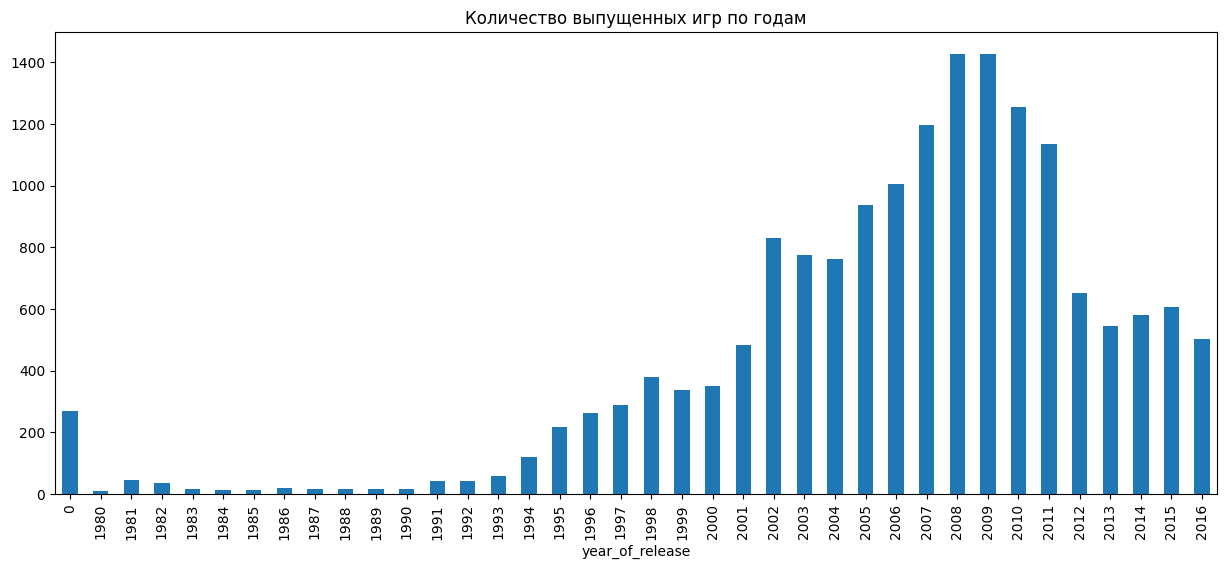

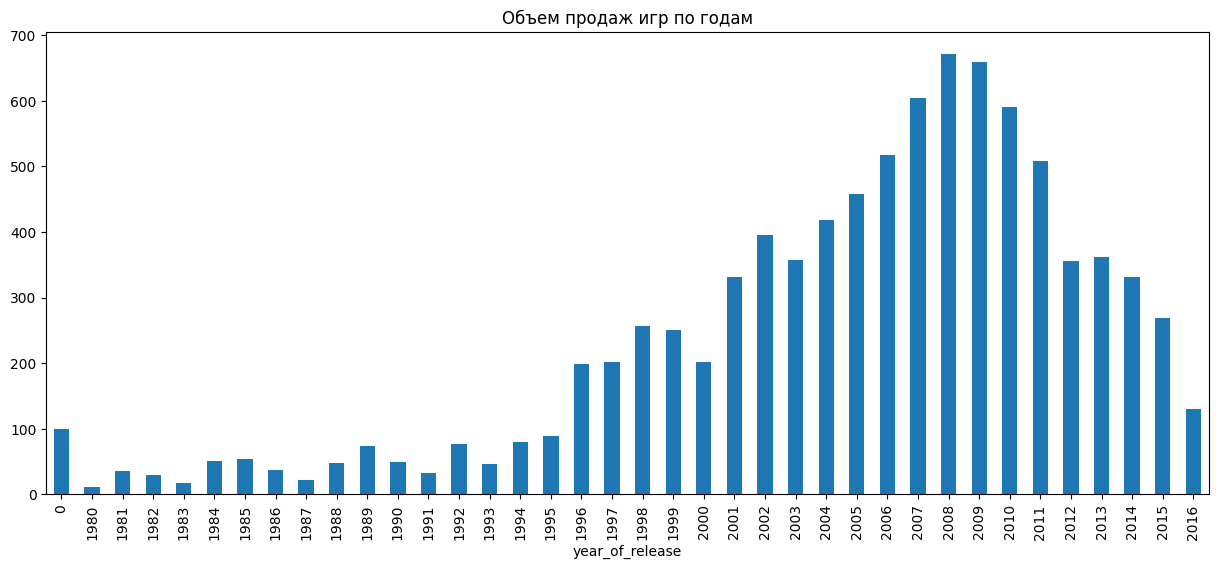

In [14]:
games_by_year = games.groupby('year_of_release')['name'].count()
#print(games_by_year.head(13))
#print(games_by_year.describe())
games_by_year.plot(kind = 'bar', title = 'Количество выпущенных игр по годам', figsize = (15, 6))
plt.show()
sales_by_year = games.groupby('year_of_release')['total_sales'].sum()
#print(sales_by_year)
sales_by_year.plot(kind = 'bar', title = 'Объем продаж игр по годам', figsize = (15, 6))
plt.show()



Можно сделать первые выводы, индустрия видеоигр начала бурно развиваться только в начале 90х годов до этого в год выходило не более двух десятков игр. Рост активно продолжался до конца нулевых годов достигнув значения в 1427 игр в год (2008), всего за 20 лет темпы производства видеоигр выросли на 2 порядка. После 2008 года количество игр резко сократилось (кризис?) до 500-600 игр в год. Плато наблюдается с 2013 по 2016 годы, данный период наиболее интересен для изучения. Объемы продаж игр показывают схожую динамику.

<a id="32"></a>
### Динамика продаж по платформам. Анализ наиболее успешных платформ. Оценка срока популярности платформы


Платформы - лидеры по выпуску игр: platform
PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
Name: name, dtype: int64
5898


Информация по платформе: PS2
year_of_release
0        34
2000     82
2001    185
2002    280
2003    256
2004    259
2005    260
2006    259
2007    214
2008    191
2009     96
2010     38
2011      7
Name: name, dtype: int64



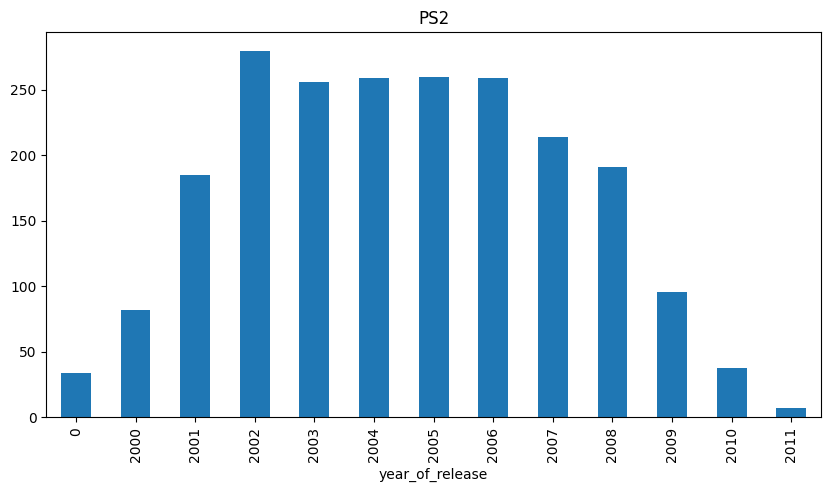

Сколько лет выходили игры: 12

Информация по платформе: DS
year_of_release
0        30
1985      1
2004     23
2005    118
2006    201
2007    376
2008    492
2009    403
2010    323
2011    153
2012     23
2013      8
Name: name, dtype: int64



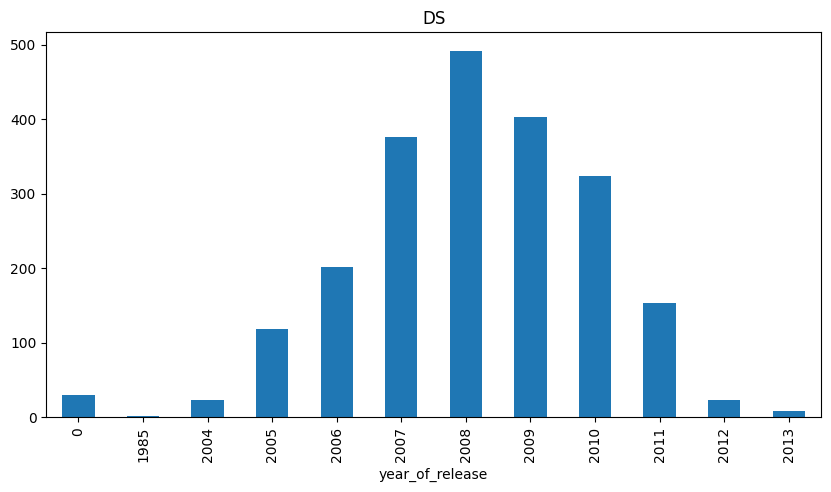

Сколько лет выходили игры: 29

Информация по платформе: PS3
year_of_release
0        25
2006     27
2007     90
2008    138
2009    162
2010    181
2011    215
2012    148
2013    126
2014    108
2015     73
2016     38
Name: name, dtype: int64



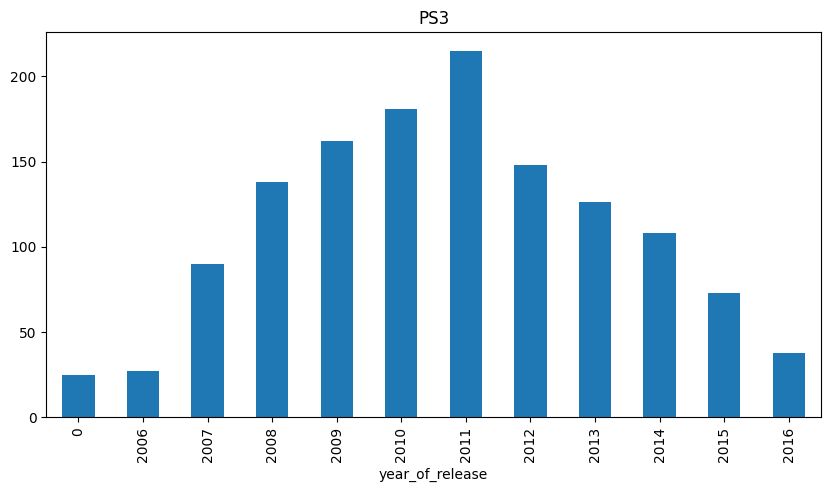

Сколько лет выходили игры: 11

Информация по платформе: Wii
year_of_release
0        34
2006     44
2007    185
2008    282
2009    325
2010    253
2011    143
2012     31
2013     12
2014      6
2015      4
2016      1
Name: name, dtype: int64



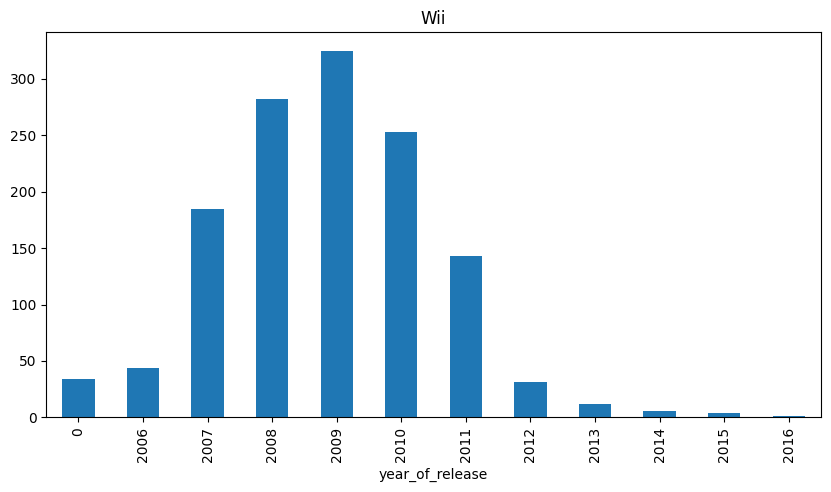

Сколько лет выходили игры: 11

Информация по платформе: X360
year_of_release
0        30
2005     18
2006     93
2007    123
2008    146
2009    172
2010    182
2011    206
2012    106
2013     75
2014     63
2015     35
2016     13
Name: name, dtype: int64



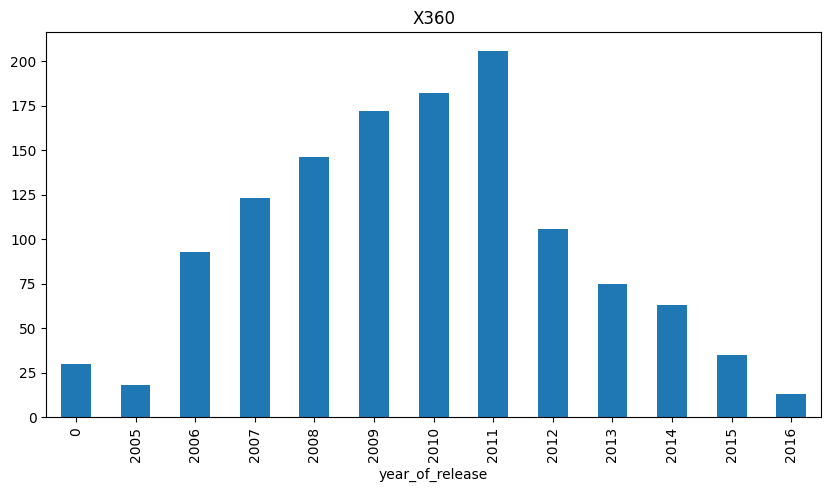

Сколько лет выходили игры: 12

Информация по платформе: PSP
year_of_release
0        16
2004     15
2005     95
2006    189
2007    133
2008    100
2009    161
2010    188
2011    139
2012    106
2013     54
2014     10
2015      3
Name: name, dtype: int64



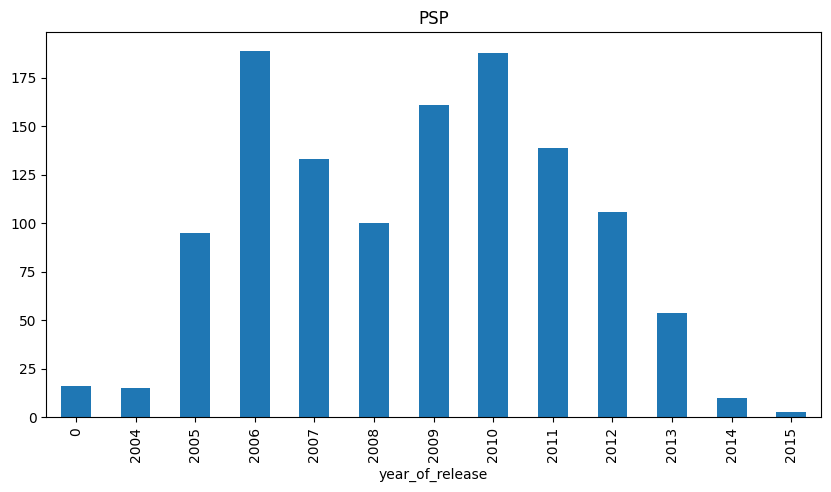

Сколько лет выходили игры: 12

Информация по платформе: PS
year_of_release
0         7
1994     17
1995     99
1996    164
1997    188
1998    248
1999    200
2000    160
2001     91
2002     20
2003      3
Name: name, dtype: int64



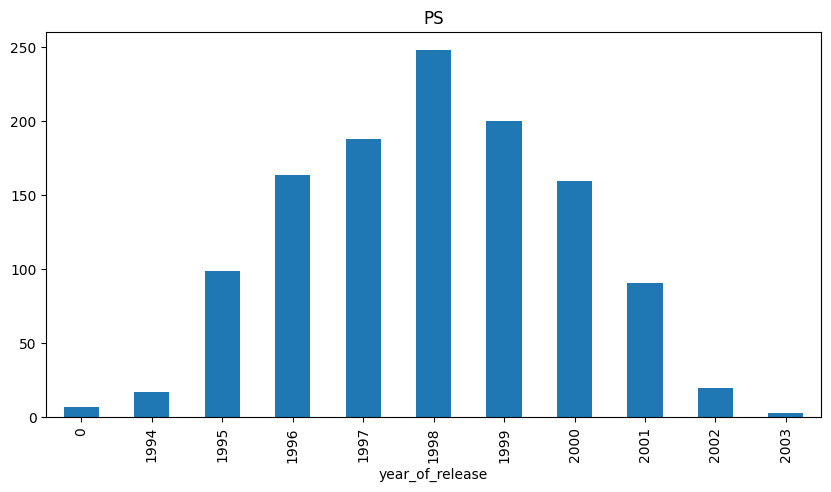

Сколько лет выходили игры: 10

Информация по платформе: PC
year_of_release
0        17
1985      1
1988      1
1992      5
1994      6
1995      2
1996      4
1997      6
1998      8
1999      7
2000      7
2001     15
2002     19
2003     33
2004     30
2005     37
2006     52
2007     62
2008     76
2009    107
2010     90
2011    139
2012     61
2013     38
2014     47
2015     50
2016     54
Name: name, dtype: int64



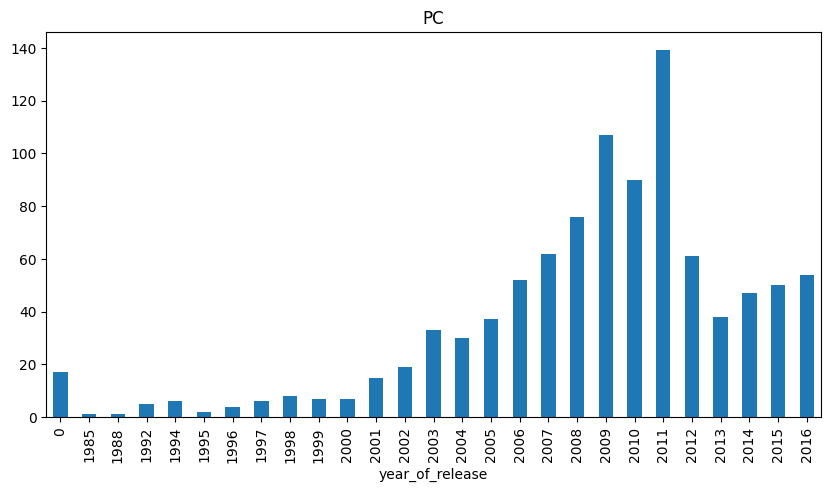

Сколько лет выходили игры: 32

Информация по платформе: XB
year_of_release
0        21
2000      1
2001     33
2002    158
2003    189
2004    177
2005    179
2006     62
2007      3
2008      1
Name: name, dtype: int64



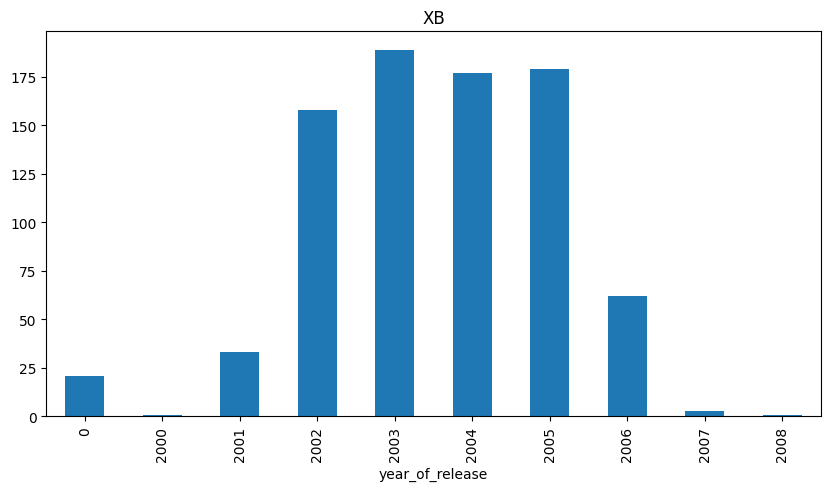

Сколько лет выходили игры: 9

Информация по платформе: GBA
year_of_release
0        11
2000      1
2001    107
2002    198
2003    150
2004    175
2005    135
2006     39
2007      6
Name: name, dtype: int64



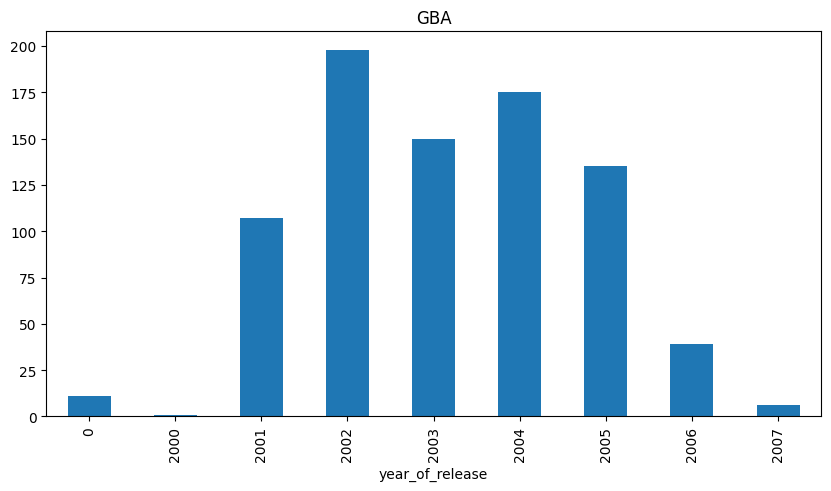

Сколько лет выходили игры: 8



In [15]:
#выбор наиболее популярных платформ
#print(games.groupby('platform')['name'].count().sort_values(ascending = False))
print('Платформы - лидеры по выпуску игр:', games.groupby('platform')['name'].count().sort_values(ascending = False).head(10))
play_station = ['PS', 'PSP', 'PS2', 'PS3']
print(len(games.query('platform in @play_station')))
print()
platform_data = games.groupby('platform')['name'].count().sort_values(ascending = False).head(10)
platform_data = platform_data.reset_index()
platform_top10 = platform_data['platform']
#print(platform_top10)
print()
platform_years = []



#количество выпущенных игр в год по платформам
def platform_life_cycle(platform):
    print('Информация по платформе:', platform)
    print(games[games['platform'] == platform].groupby('year_of_release')['name'].count())
    print()
    games[games['platform'] == platform].groupby('year_of_release')['name'].count().plot(title = platform, kind = 'bar', figsize = (10, 5))
    plt.show()
    print('Сколько лет выходили игры:', 1+games[(games['platform'] == platform) & (games['year_of_release'] != 0)]['year_of_release'].max() - games[(games['platform'] == platform) & (games['year_of_release'] != 0)]['year_of_release'].min())
    platform_years.append(1+games[(games['platform'] == platform) & (games['year_of_release'] != 0)]['year_of_release'].max() - games[(games['platform'] == platform) & (games['year_of_release'] != 0)]['year_of_release'].min())
    print()
#прогоним через цикл топ 10 платформ
for pl_name in platform_top10:
    platform_life_cycle(pl_name)
    


In [16]:
print(games[(games['platform'] == 'DS')&(games['year_of_release'] == 1985)])
games[(games['platform'] == 'DS')&(games['year_of_release'] == 1985)]['year_of_release'].replace(1985, np.nan)
#и подправим соответственно строку platform_years

print(platform_years)
platform_data['life_cycle'] = platform_years
print()
platform_data.loc[1, 'life_cycle'] = 10

print(platform_data)
print()
#Типовое распределение продолжительности лет выхода игр по платформам (без ПК)
print(platform_data.query('platform != "PC"')['life_cycle'].describe())

                                      name platform  year_of_release   genre  \
15955  Strongest Tokyo University Shogi DS       DS             1985  Action   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
15955       0.0       0.0      0.02          0.0           NaN         NaN   

      rating  total_sales  rating_age  
15955    NaN         0.02         NaN  
[12, 29, 11, 11, 12, 12, 10, 32, 9, 8]

  platform  name  life_cycle
0      PS2  2161          12
1       DS  2151          10
2      PS3  1331          11
3      Wii  1320          11
4     X360  1262          12
5      PSP  1209          12
6       PS  1197          10
7       PC   974          32
8       XB   824           9
9      GBA   822           8

count     9.000000
mean     10.555556
std       1.424001
min       8.000000
25%      10.000000
50%      11.000000
75%      12.000000
max      12.000000
Name: life_cycle, dtype: float64


Вывод 10 наиболее популярных по выпуску игр платформ несколько удивляет, оказывается ПК не то что не в лидерах, а едва входит в 10ку. Абсолютным лидером являются платформы PlayStation, суммарно на них вышло почти 6000 игр, что составляет более трети всей выборки. Создадим функцию для вывода графиков выпускаемых игр по годам для каждой платформы и прогоним топ 10 платформ через цикл. Заметили странное (непоследовательное) значение в платформе DS, первый год игры 1984 (1 игра) и далее 2004. Посокольку Nintendo DS вышла в 2004 году обнулим год выпуска данной записи. Может кто-то просто перепутал год при вводе или произошел сбой, но мы заменим год выпуска данной игры на NaN и подкорректируем таблицу. Средний "период жизни" платформы составлет 10,5 лет, медиана 11, стандартное отклонение всего 1.4. 


<a id="33"></a>
### Выбор репрезентативного периода для построения прогнозов на следующий год


По совокупности исследования "срока жизни" платформы и объемов выпускаемых игр по годам, можно уверенно констатировать что данные нас интересуют за период не более 10 лет. С учетом резкого сокращения выпуска игр в 2012 году и относительно стабильный выпуск игр в период с 2013 по 2016, именно последние 4 года выглядят наиболее актуальными для построения дальнейших прогнозов. Выделим в датафрейм data выборку за актуальный период:

In [17]:
data = games.query('year_of_release > 2012').copy()
print(data['year_of_release'].unique())  # проверка



[2013 2015 2014 2016]


<a id="34"></a>
### Оценка продаж по платформам, выявление растущих и падающих? Выбор нескольких наиболее успешных платформ


In [18]:
# платформы-лидеры по продажам
print(data.head(2))
print()
top_sales_platform = data.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values('total_sales', ascending = False)
print(top_sales_platform)

#выберем топ платформ за актуальный период


                  name platform  year_of_release   genre  na_sales  eu_sales  \
16  Grand Theft Auto V      PS3             2013  Action      7.02      9.09   
23  Grand Theft Auto V     X360             2013  Action      9.66      5.14   

    jp_sales  other_sales  critic_score  user_score rating  total_sales  \
16      0.98         3.96          97.0         8.2      M        21.05   
23      0.06         1.41          97.0         8.1      M        16.27   

    rating_age  
16        17.0  
23        17.0  

          total_sales
platform             
PS4            314.14
PS3            181.43
XOne           159.32
3DS            143.25
X360           136.80
WiiU            64.63
PC              39.43
PSV             32.99
Wii             13.66
PSP              3.50
DS               1.54


Построим сводную таблицу с совокупным объемом продаж по платформам. По суммарному количеству продаж с 2013 по 2016 существенно отрываются 5 платформ (более 100 млн копий): PS4, PS3, X360, 3DS, XOne. Далее с объемом продаж свыше 30 и до 90 млн расположились WiiU, PC, PSV, Wii, совсем в отстающих (порядка 10 млн копий за 5 лет) DS и PSP. Последние 2 откинем уже на данном этапе. По остальным проверим динамику продаж и оставим уже только перспективные для рекламы.

/var/folders/xp/qz3qwdx54n5gr4n6wlytv_240000gn/T/ipykernel_17367/1374172815.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


0     PS4
1     PS3
2    XOne
3     3DS
4    X360
5    WiiU
6      PC
7     PSV
8     Wii
Name: platform, dtype: object



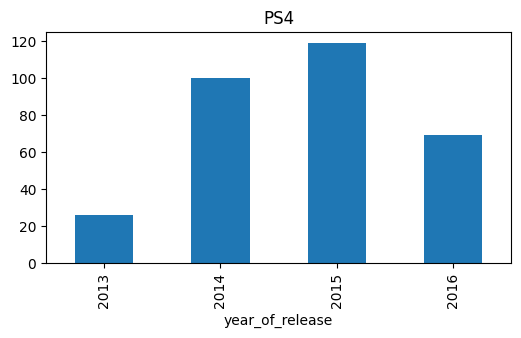

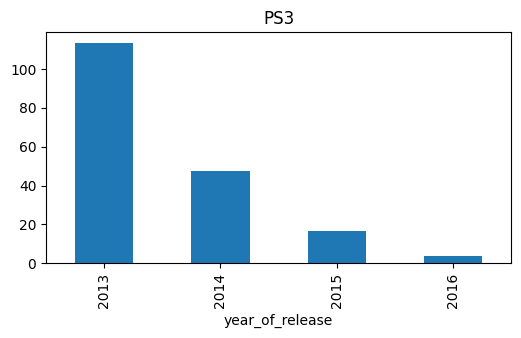

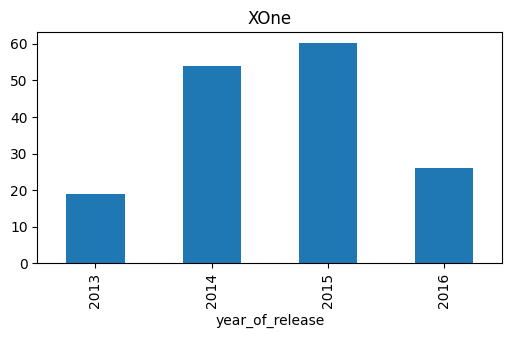

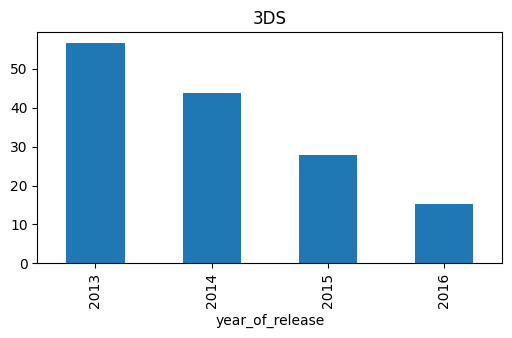

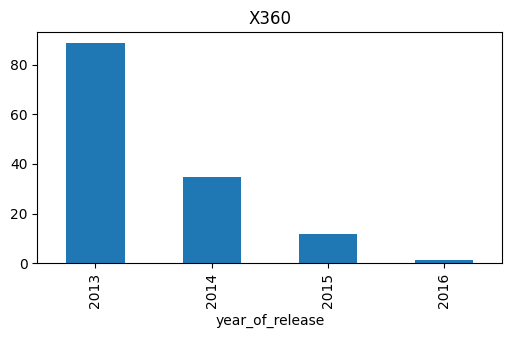

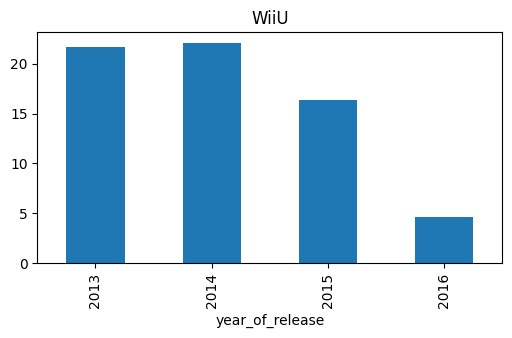

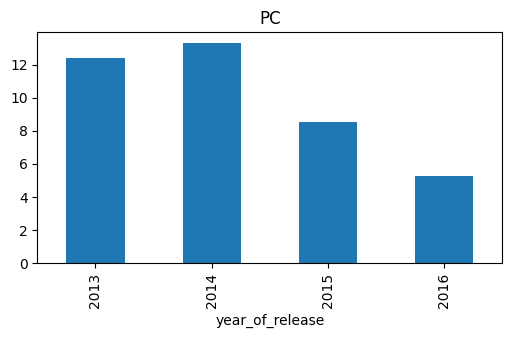

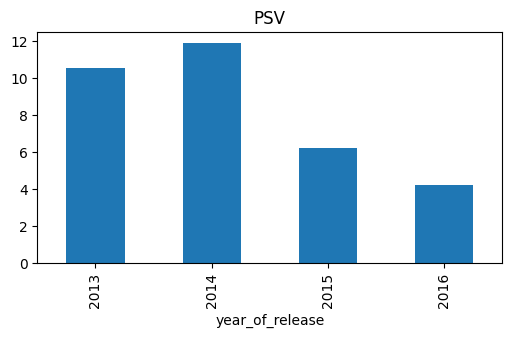

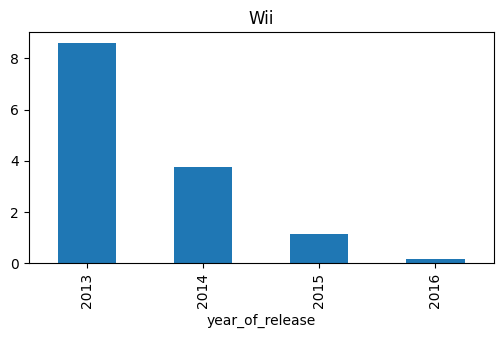

In [19]:
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 100em; }</style>"))

top9_platform = top_sales_platform['total_sales'].head(9)
#print(top9_platform)
top9_platform = top9_platform.reset_index()
#print(top9_platform)
top9_list = top9_platform['platform']
print(top9_list)
print()

def platform_din(platform):
    data[data['platform'] == platform].groupby('year_of_release')['total_sales'].sum().plot(kind = 'bar', title = platform, figsize = (6, 3))
    plt.show()
    print()
    
for name in top9_list:
    platform_din(name)



Посмотрим на динамику, пропутив через цикл объемы проданных игр по каждой платформе за 5 последних лет:
 - PS4. Хоть в 2016 году продажи и снизились вдвое по сравнению с предыдущим годом, они все также внушительны, 70 млн копий
 - PS3. Увы, устаревание платформы драмматично сказывается на объемах, всего пару миллионов копий. Иключаем.
 - X360. Та же картина
 - 3DS. Динамика - не фонтан, но около 15 млн игр все еще проддается. Подумаем.
 - XOne. Падение за последний год, но под 30 млн проданных копий за 2016 - внушительно. Скорее оставляем.
 - WiiU. Динамика стремительно падающая, за 2016 год 5 млн копий. Исключаем.
 - PC. Продажи постепенно падают, за 2016 год около 5 млн копий. Подумаем.
 - PSV. Аналогично PC.
 - Wii. Без слез не взглянешь, исключаем.
 Итого, оставляем тройку платформ с продажами в 2016 свыше 15 млн копий: PS4, 3DS, XOne. Суммарно на 3 платформы приходится 
 более 110 млн проданных игр, что составляет долю в более чем 80%.

<a id="35"></a>
### Анализ распределений продаж по платформам


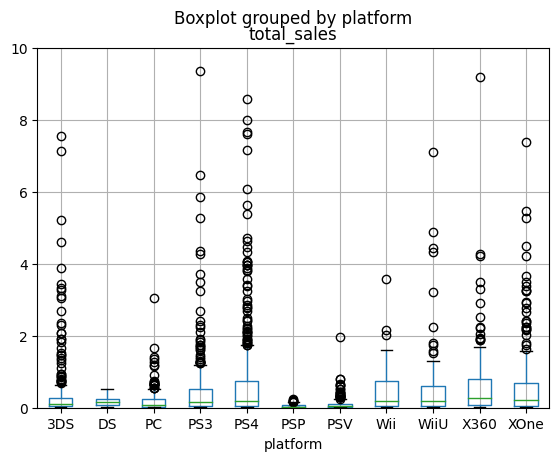

In [20]:
data.boxplot('total_sales', by='platform')
plt.ylim(0, 10)
plt.show()

Анализируя диаграмму "ящик с усами" по глобальным продажам игр (по платформам) за период 2013-2016 гг. приходим к тому, что платформы можно разбить на 3 группы:
 - "Лидеры", высокие средние продажи по играм: PS3, PS4, Wii, WiiU, X360, XOne
 - "Середнячки": 3DS, DS, PC
 - "Отстающие": PSP, PSV
Такая разбивка очевидно не учитывает количество выпущенных игр по платформам, в связи с чем и немного оличается от разбиения в предыдущем пункте. Также из диаграммы можно подчеркнуть некоторую специфику распределения объемов продаж игр по платформам. Так, например, причисленные к лидерам платформы, имеют весьма схожий межквартильный размах (как и медианные значения продаж по играм). Самый спорный для отнесения к какой-либо группе платформой является PS 3, по медиане она между определенной группой лидеров и середнячков, а вот по межквартильному размаху ближе к лидерам.

В остальном, отметим полное отсутсвтие выбросов по платформе DS, и практически полное отсутствие их по платформе Wii. Минимальное соотношение разброса к медиане объемов проданных копий у лидеров наблюдается у платформ WiiU, X360, XOne, хотя разница и не столь существенна. Судя по построенной диаграмме, все распределения скошены вправо.

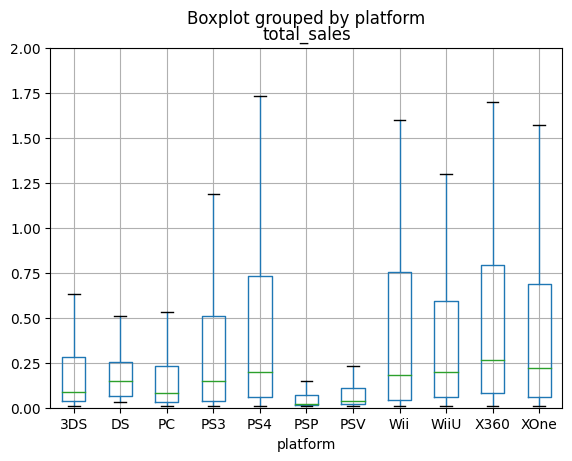

In [21]:
data.boxplot('total_sales', by='platform', showfliers = False)
plt.ylim(0, 2)
plt.show()



<a id="36"></a>
### Оценка взаимосвязи между рейтингом пользователей и критиков. Определение зависимости между продажами игр и их рейтингом


Для данного исследования рассмотрим лидера по количеству проданных игр в 2016 и потенциально наиболее перспективную платформу - PS4. PS 4 вышла в конце 2013 года, поэтому период рассматривается все равно актуальный.

392
Процент пропусков
name                0.000000
platform            0.000000
year_of_release     0.000000
genre               0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       35.714286
user_score         34.438776
rating             34.948980
total_sales         0.000000
rating_age         34.948980
dtype: float64

[2015 2014 2016 2013]

239

Корреляция между общими продажами игры и оценками критиков
0.40656790206178156



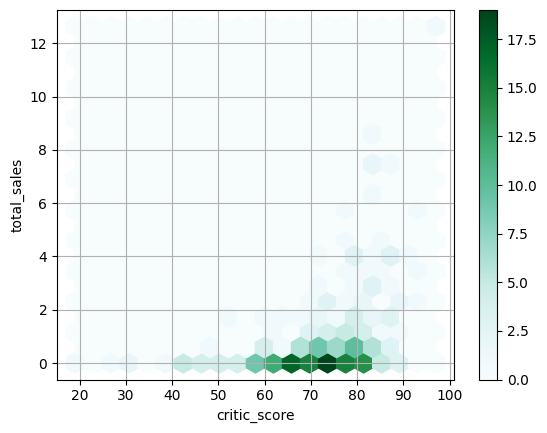

Корреляция между общими продажами игры и пользовательскими оценками
-0.03195711020455645


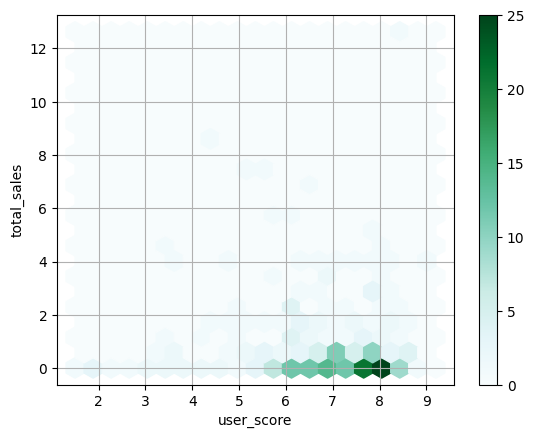

In [22]:
data_ps4 = games[games['platform'] == 'PS4']
print(len(data_ps4))
print('Процент пропусков')
print(100*data_ps4.isna().sum()/len(data_ps4))
print()
# пропущенных данных (в %) меньше чем по всей выборке
print(data_ps4['year_of_release'].unique())
print()
print(len(data_ps4.dropna()))
print()

print('Корреляция между общими продажами игры и оценками критиков')
print(data_ps4['total_sales'].corr(data_ps4['critic_score']))
print()
#data_ps4.plot(x  = 'critic_score', y = 'total_sales', kind = 'scatter') 
data_ps4.plot(x  = 'critic_score', y = 'total_sales', kind = 'hexbin', gridsize = 20, sharex = False, grid = True)
plt.show()



print('Корреляция между общими продажами игры и пользовательскими оценками')
print(data_ps4['total_sales'].corr(data_ps4['user_score']))
#data_ps4.plot(x  = 'user_score', y = 'total_sales', kind = 'scatter')
data_ps4.plot(x  = 'user_score', y = 'total_sales', kind = 'hexbin', gridsize = 20, sharex = False, grid = True)
plt.show()

С учетом пропущенных значений, выборка содержит 239 записей, то есть попущены значения зачастую сразу во всех "неполных" строках. Полученные для пар значений "общий объем продаж" - "оценка критиков" и "общий объем продаж" - "оценка пользователей" коэффициенты корреляции составляют 0.4 и -0.03 соответственно. Если оценка критиков и оказывает небольшое влияние на продажи, то про оценку пользователей такого не скажешь. Попробуем также посмотреть медианное количество продаж в зависимости от рейтинга:

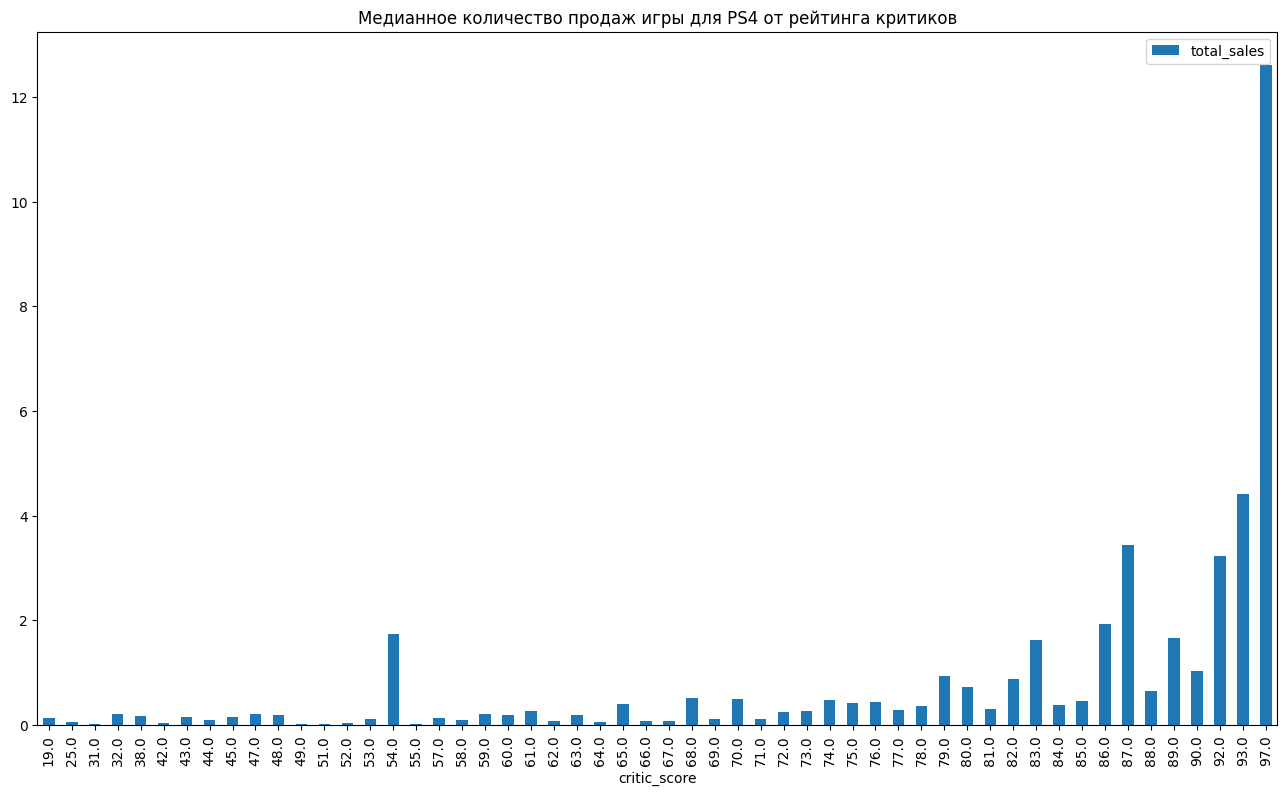

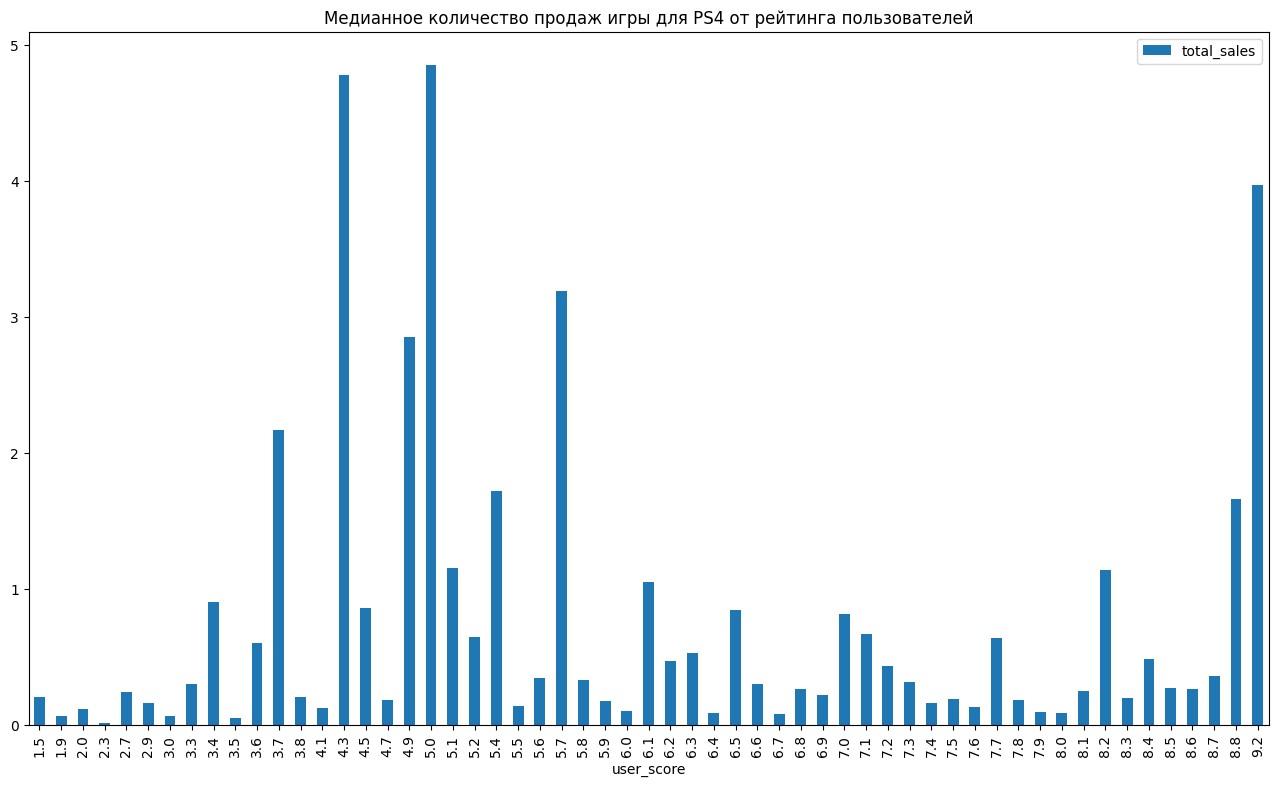

In [23]:

data_ps4.pivot_table(index = 'critic_score', values = 'total_sales', aggfunc = 'median').plot(kind = 'bar', figsize  = (16, 9), title = 'Медианное количество продаж игры для PS4 от рейтинга критиков')
plt.show()


data_ps4.pivot_table(index = 'user_score', values = 'total_sales', aggfunc = 'median').plot(kind = 'bar', figsize  = (16, 9), title = 'Медианное количество продаж игры для PS4 от рейтинга пользователей')
plt.show()

Картина та же, если для взаимосвязи между продажами о ценками критиков, можно отметить тренд при оценке от 70 и выше, то для оценки пользователей никаких существенных трендов не выявлено. Можно заключить, что оценка критиков существенно более полезна для построения прогнозов.

зависимость между количеством продаж игры для PS4 от рейтинга critic_score
[2015 2014 2016 2013]
Коэффициент корреляции:  0.40656790206178156



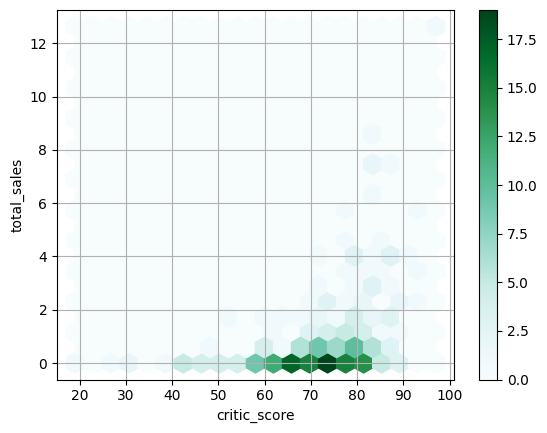

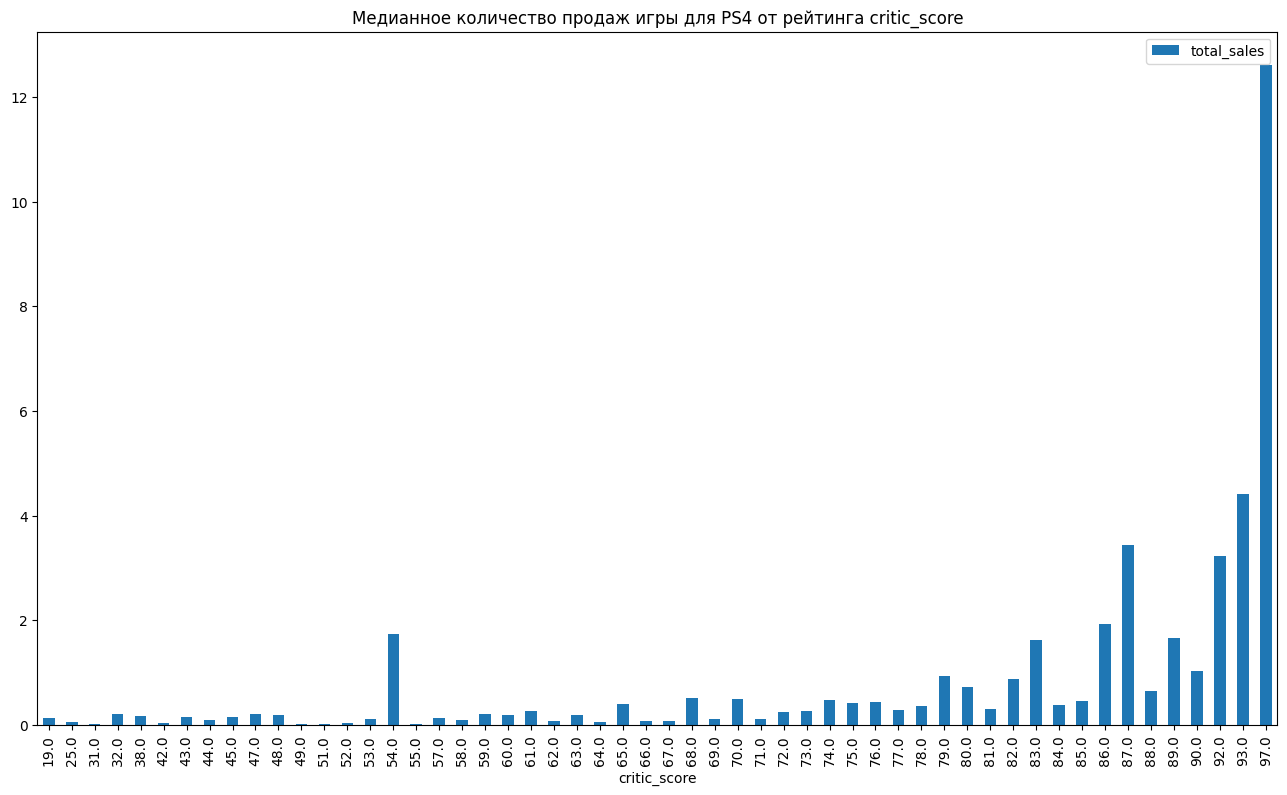

зависимость между количеством продаж игры для PS4 от рейтинга user_score
[2015 2014 2016 2013]
Коэффициент корреляции:  -0.03195711020455645



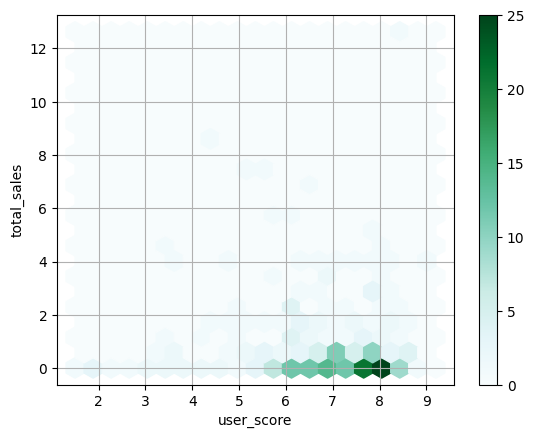

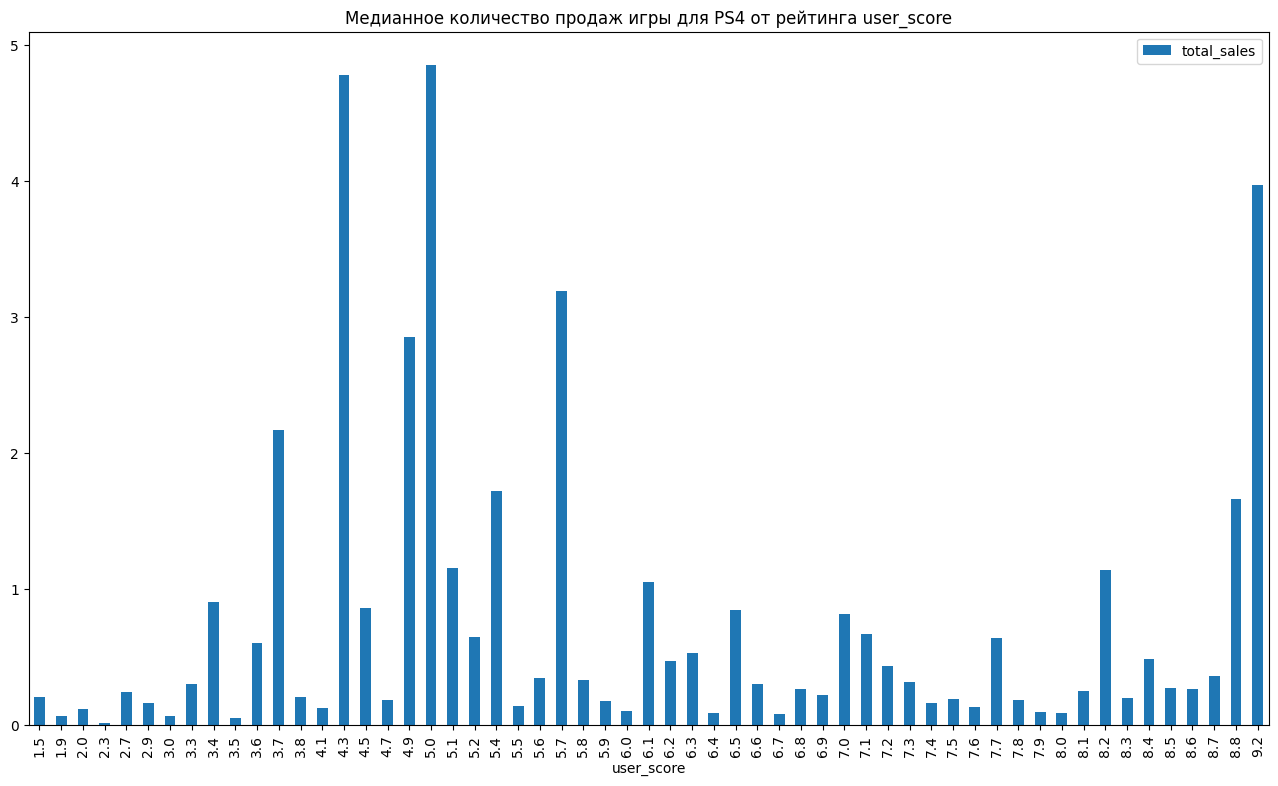

зависимость между количеством продаж игры для 3DS от рейтинга critic_score
[2013 2014 2016 2015]
Коэффициент корреляции:  0.3570566142288104



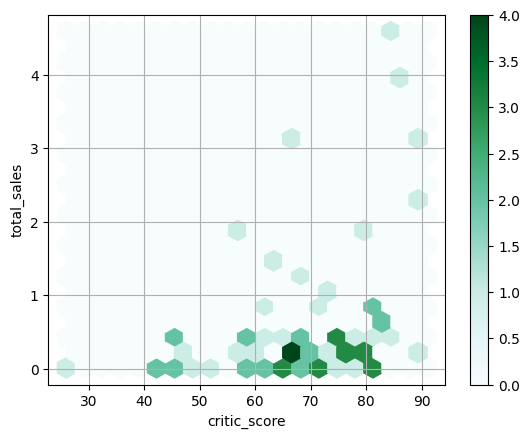

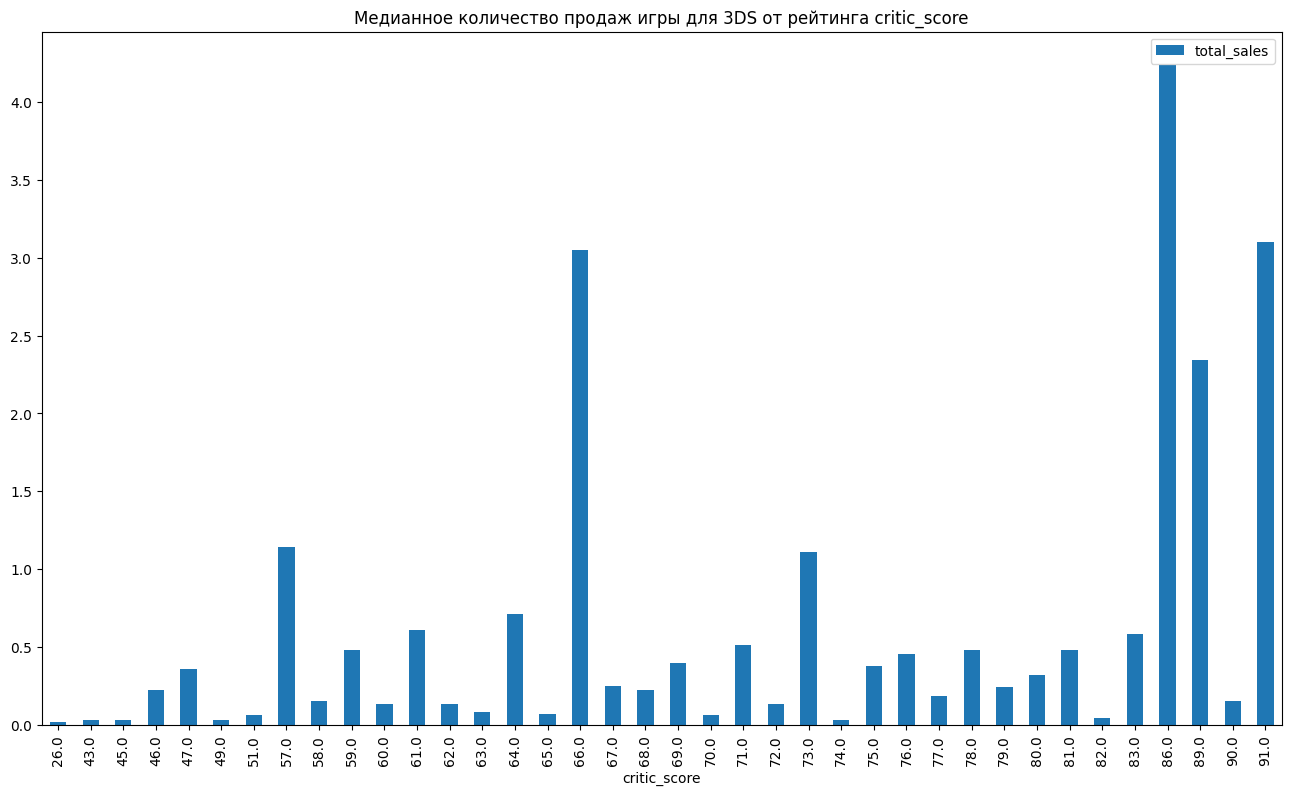

зависимость между количеством продаж игры для 3DS от рейтинга user_score
[2013 2014 2016 2015]
Коэффициент корреляции:  0.24150411773563024



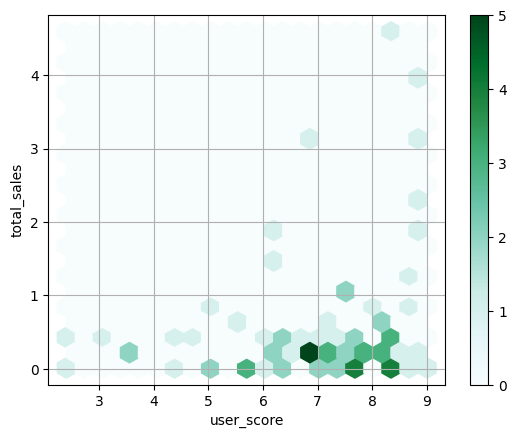

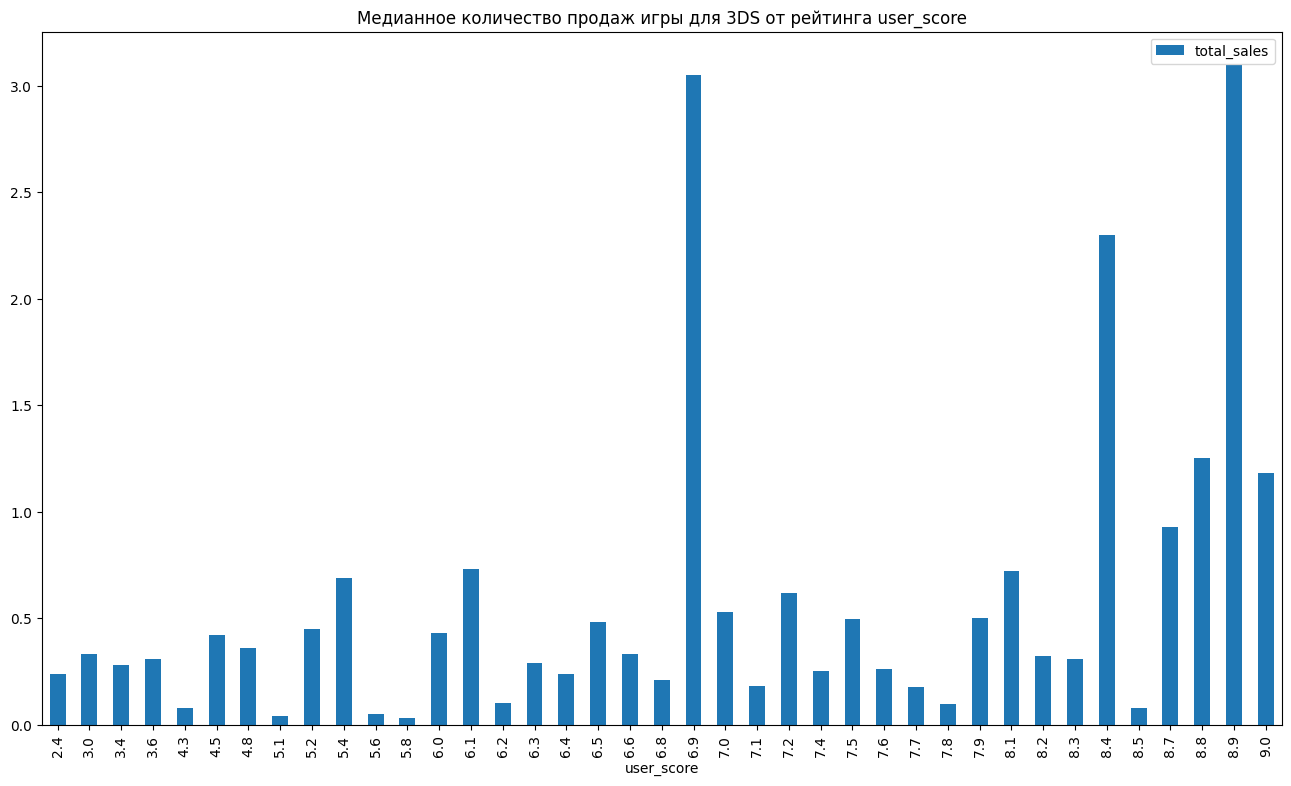

зависимость между количеством продаж игры для XOne от рейтинга critic_score
[2015 2014 2013 2016]
Коэффициент корреляции:  0.4169983280084016



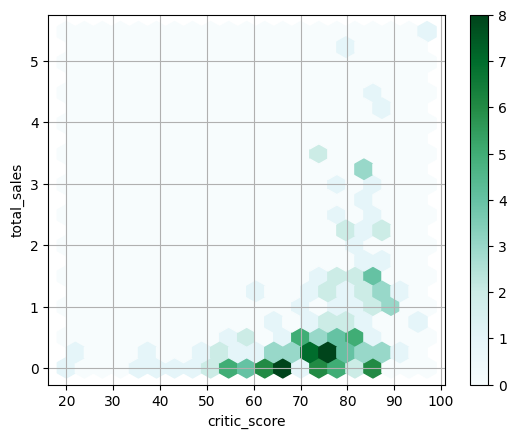

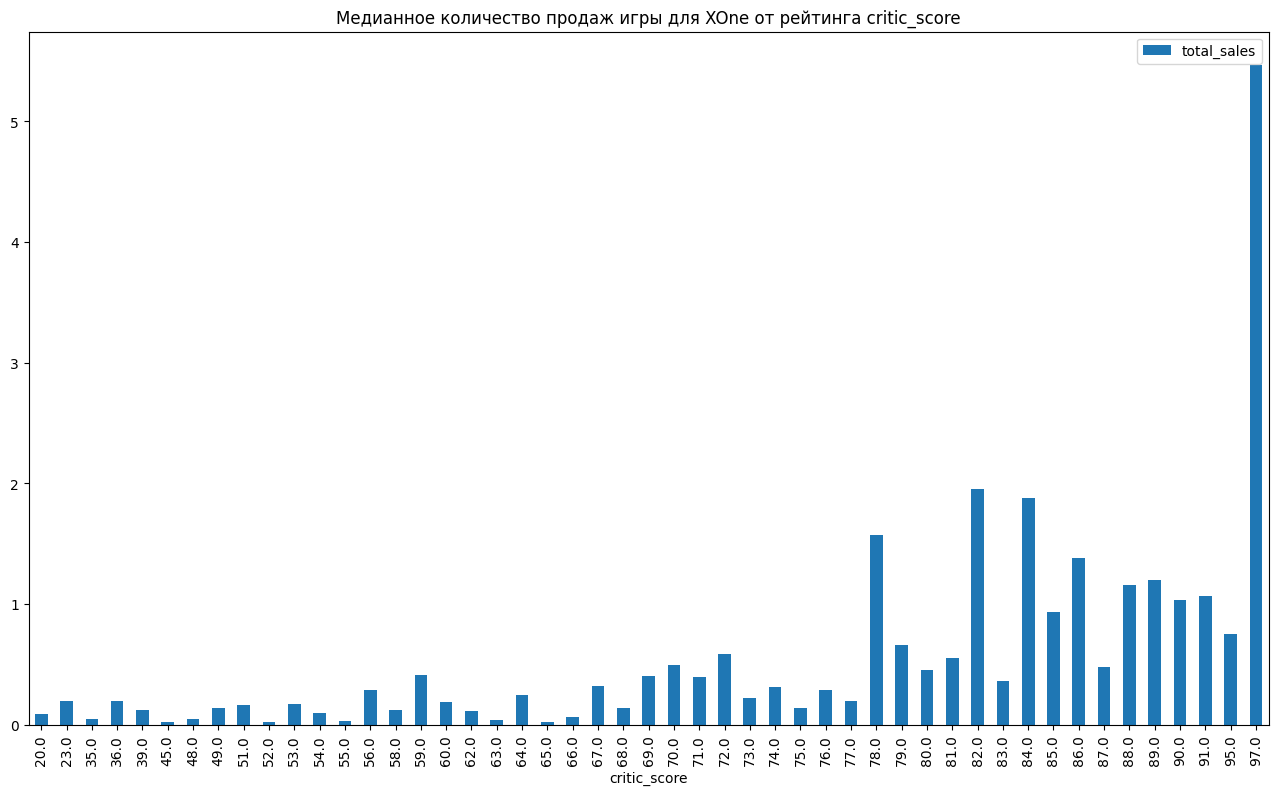

зависимость между количеством продаж игры для XOne от рейтинга user_score
[2015 2014 2013 2016]
Коэффициент корреляции:  -0.0689250532827942



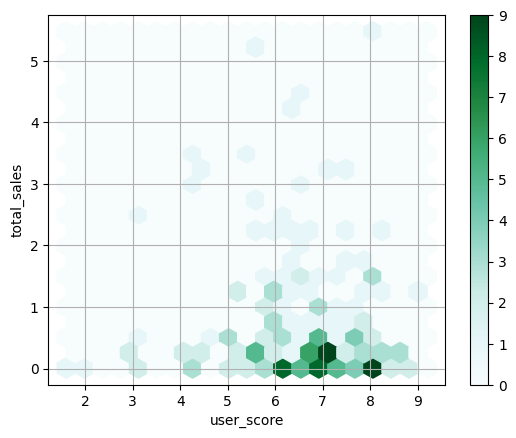

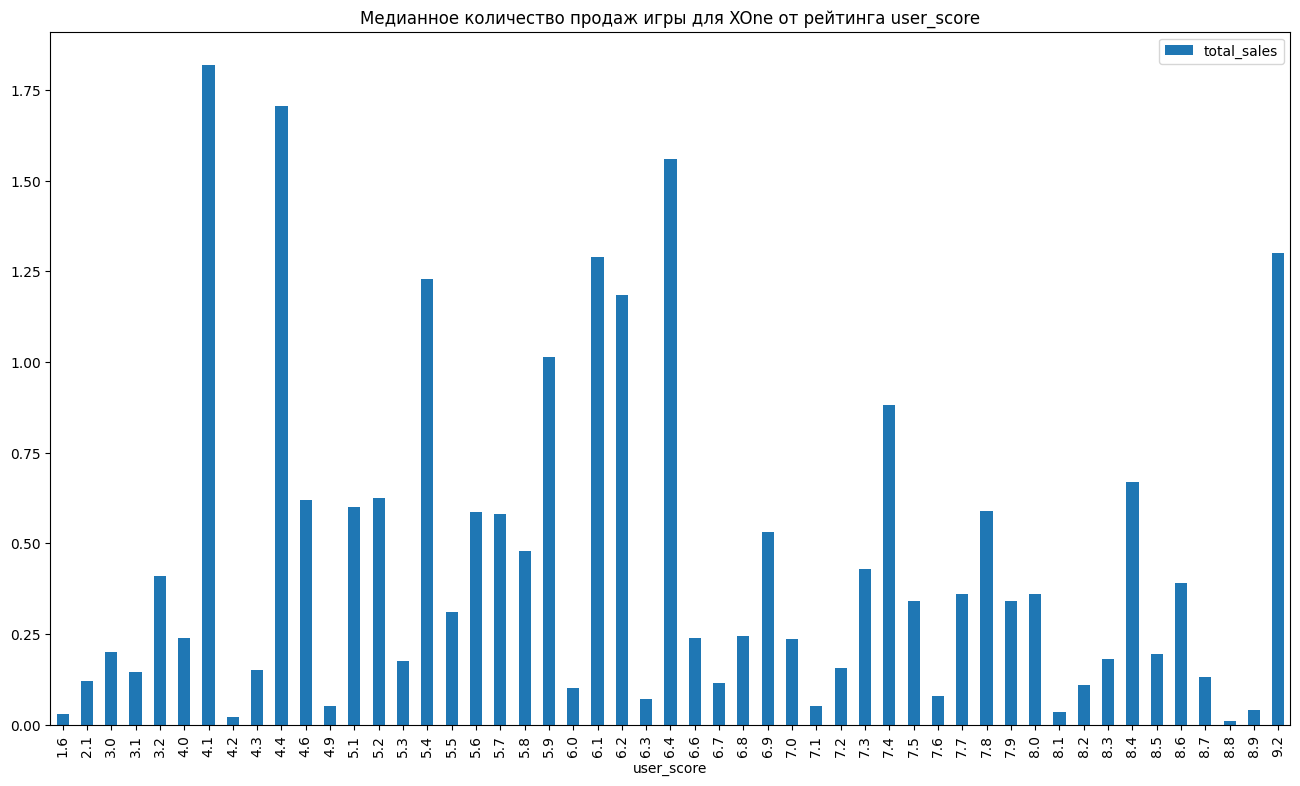

In [24]:
def corr_rating_sales_actual(score, platform):
    print('зависимость между количеством продаж игры для {} от рейтинга {}'.format(platform, score))
    games_platform_actual = data[data['platform'] == platform]
    print(games_platform_actual['year_of_release'].unique())
    print('Коэффициент корреляции: ', games_platform_actual['total_sales'].corr(games_platform_actual[score]))
    print()

    games_platform_actual.plot(x  = score, y = 'total_sales', kind = 'hexbin', gridsize = 20, sharex = False, grid = True)
    plt.show()
    games_platform_actual.pivot_table(index = score, values = 'total_sales', aggfunc = 'median').plot(kind = 'bar', figsize  = (16, 9), title = 'Медианное количество продаж игры для {} от рейтинга {}'.format(platform, score))
    plt.show()

corr_rating_sales_actual('critic_score', 'PS4')
corr_rating_sales_actual('user_score', 'PS4')
    
    
corr_rating_sales_actual('critic_score', '3DS')
corr_rating_sales_actual('user_score', '3DS')

corr_rating_sales_actual('critic_score', 'XOne')
corr_rating_sales_actual('user_score', 'XOne')

Отметим, что результаты практически не изменились, выводы не меняются

<a id="37"></a>
### Соотнесение результатов зависимостей по разным платформам


Для уверенности проверим степень взаимосвязи для других платформ, выделенных ранее: 3DS, XOne

зависимость между количеством продаж игры для 3DS от рейтинга critic_score
0.34940093039241304



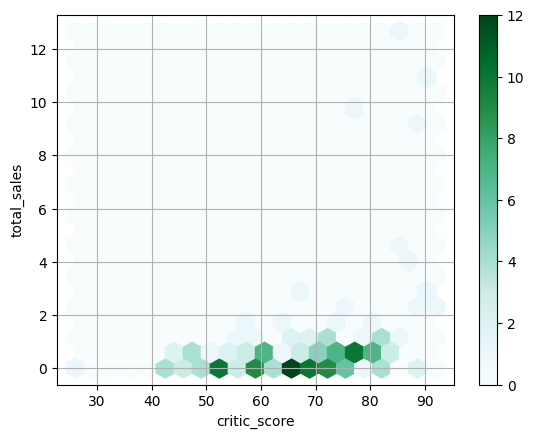

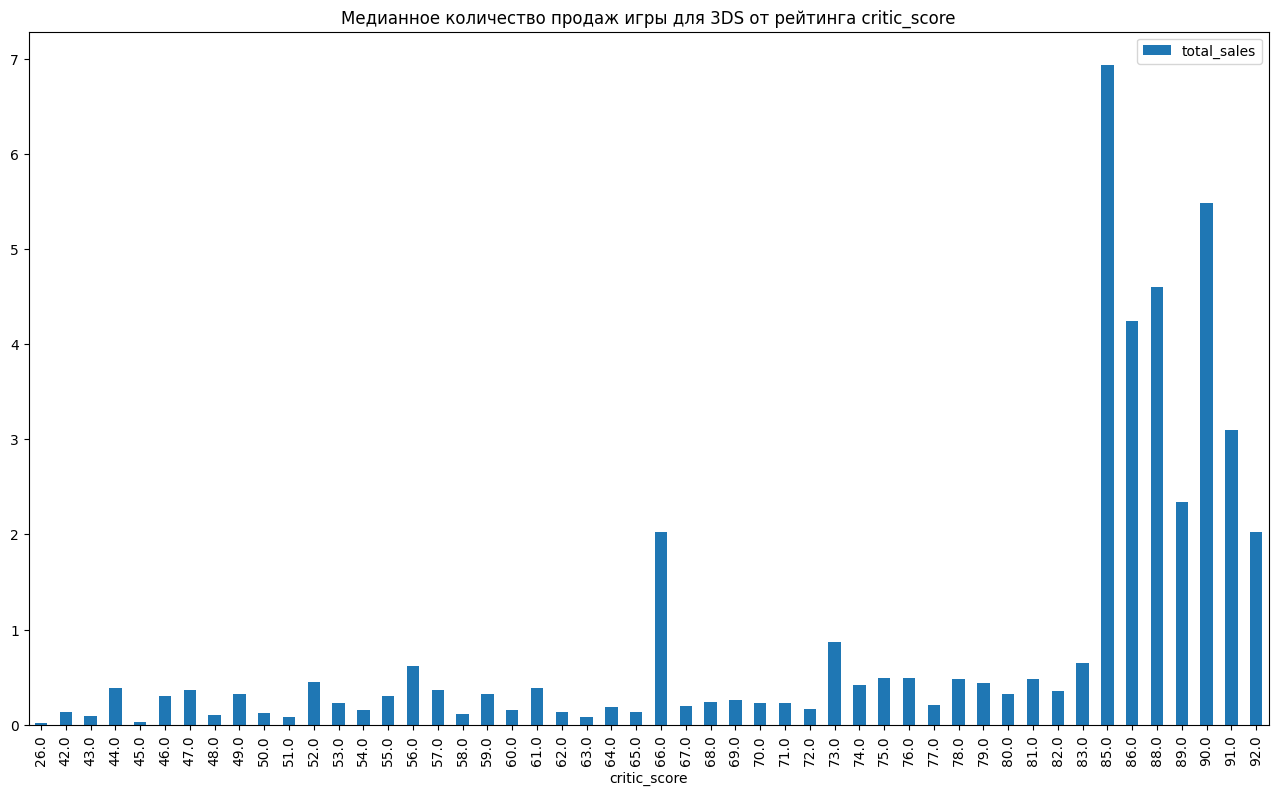

зависимость между количеством продаж игры для 3DS от рейтинга user_score
0.22480798039571068



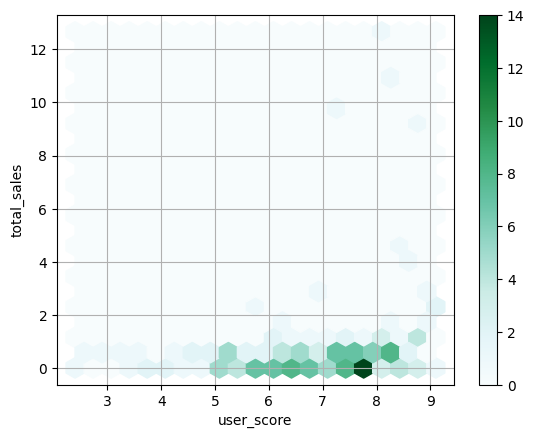

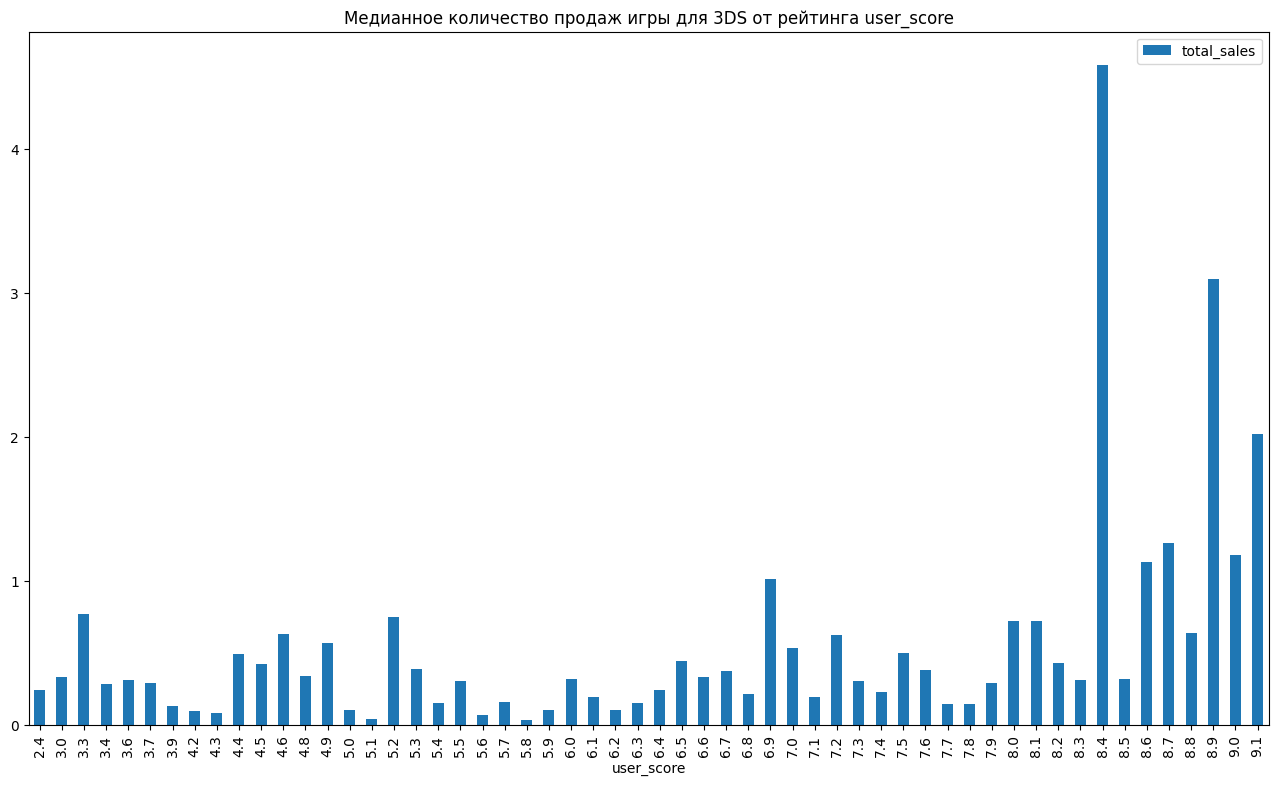

зависимость между количеством продаж игры для XOne от рейтинга critic_score
0.4169983280084016



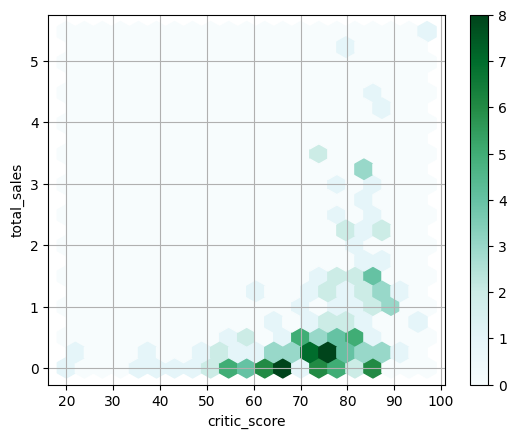

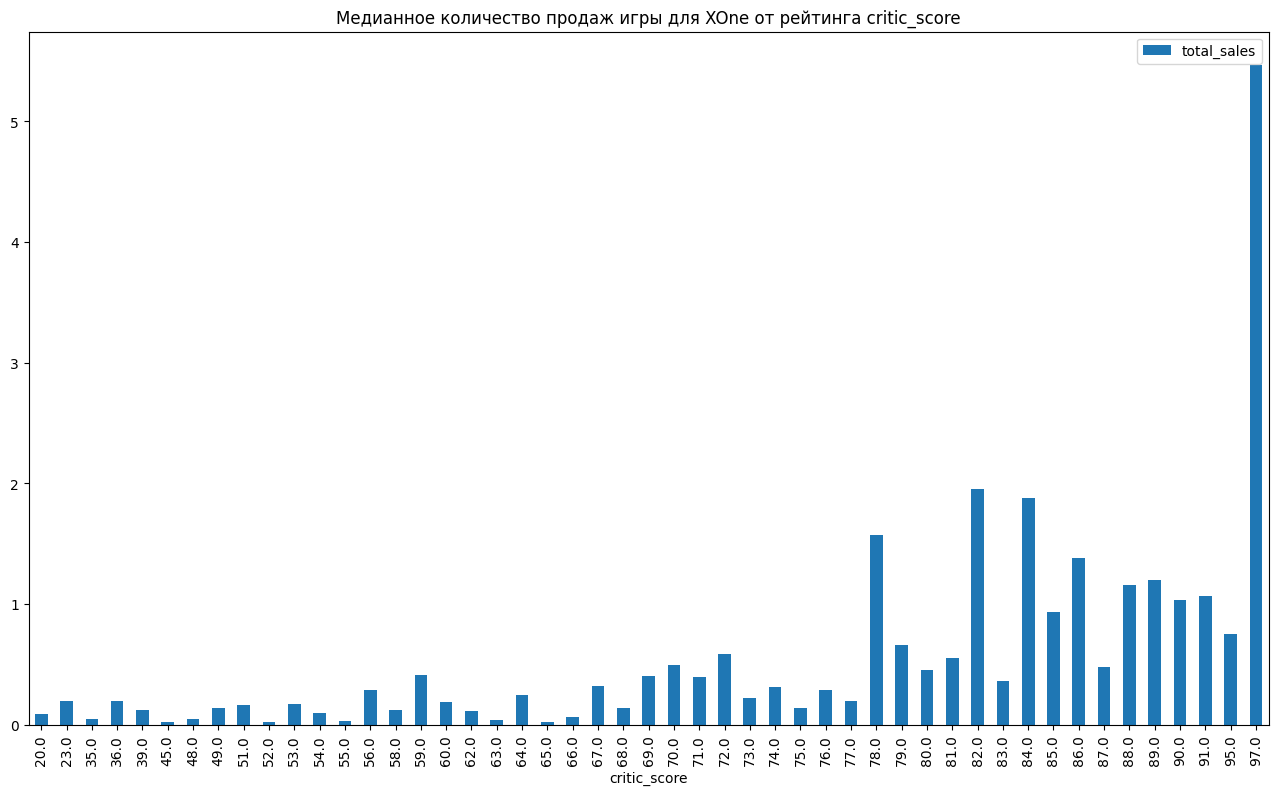

зависимость между количеством продаж игры для XOne от рейтинга user_score
-0.0689250532827942



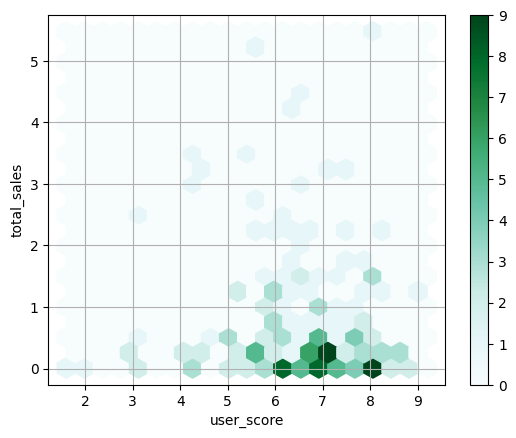

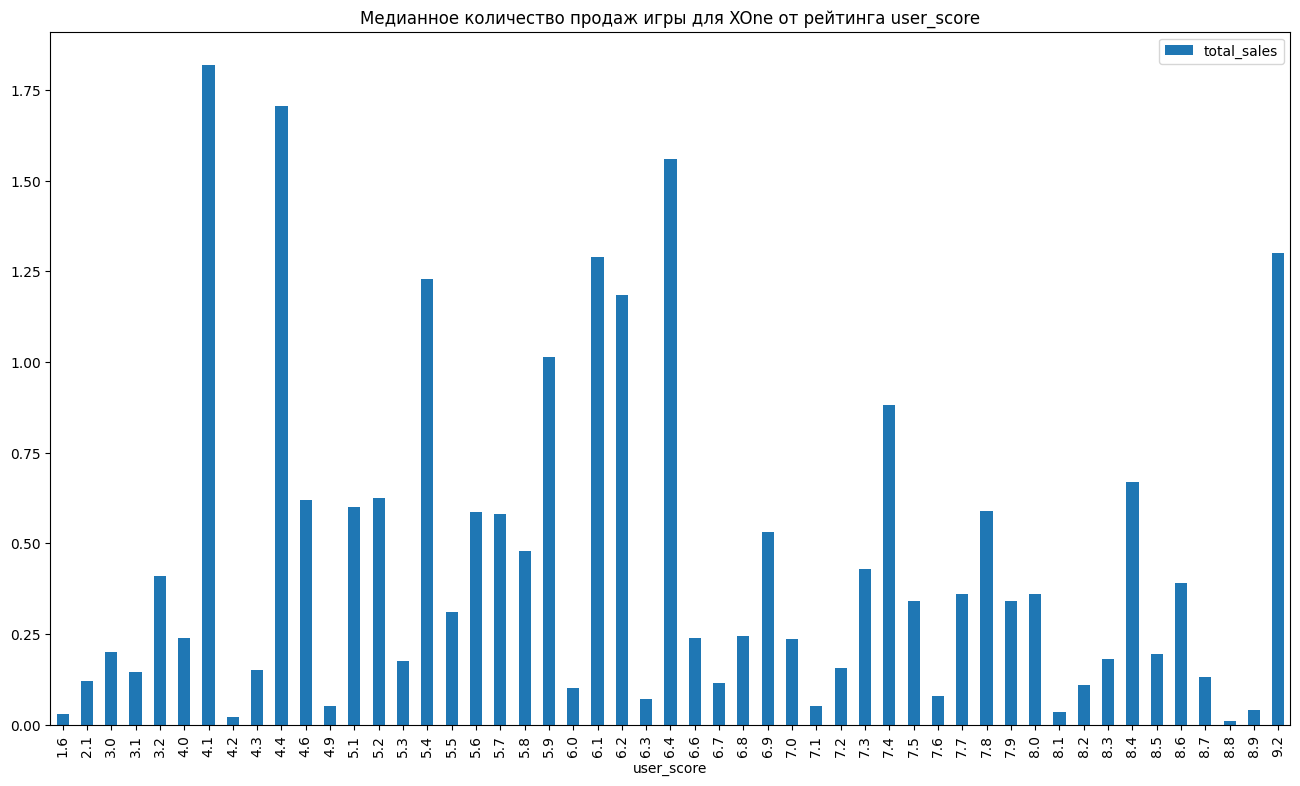

In [25]:
def corr_rating_sales(score, platform):
    print('зависимость между количеством продаж игры для {} от рейтинга {}'.format(platform, score))
    games_platform = games[games['platform'] == platform]
    print(games_platform['total_sales'].corr(games_platform[score]))
    print()

    games_platform.plot(x  = score, y = 'total_sales', kind = 'hexbin', gridsize = 20, sharex = False, grid = True)
    plt.show()
    games_platform.pivot_table(index = score, values = 'total_sales', aggfunc = 'median').plot(kind = 'bar', figsize  = (16, 9), title = 'Медианное количество продаж игры для {} от рейтинга {}'.format(platform, score))
    plt.show()

corr_rating_sales('critic_score', '3DS')
corr_rating_sales('user_score', '3DS')

corr_rating_sales('critic_score', 'XOne')
corr_rating_sales('user_score', 'XOne')


Для еще 2 платформ наблюдаем схожую картину. Корреляция с оценкой критиков остается в диапазоне 0.35 - 0.4, с пользовательскими оценками - до 0.25. При этом для игр с оценкой критиков более 60-80 (в зависимости от платформы) наблюдается растущий тренд медианы проданных копий.

<a id="38"></a>
### Анализ общего распределения игр по жанрам. Распределение продаж игр по жанрам


In [26]:
#print(games.head(1))
print()
print('Количество игр по жанрам, шт')
print(games.groupby('genre')['name'].count().sort_values(ascending = False))
print()

print('Среднее количество продаж игр по жанру, млн копий')
print(games.groupby('genre')['total_sales'].mean().sort_values(ascending = False))
print()

print('Медианное количество продаж игр по жанру, млн копий')
print(games.groupby('genre')['total_sales'].median().sort_values(ascending = False))
print()

print('Самые продаваемые жанры')
print(games.groupby('genre')['total_sales'].sum().sort_values(ascending = False).head())
print()

print('Самые непродаваемые жанры')
print(games.groupby('genre')['total_sales'].sum().sort_values().head())
print()


Количество игр по жанрам, шт
genre
Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: name, dtype: int64

Среднее количество продаж игр по жанру, млн копий
genre
Platform        0.932173
Shooter         0.795503
Role-Playing    0.623872
Racing          0.583403
Sports          0.566980
Fighting        0.527126
Action          0.517711
Misc            0.458577
Simulation      0.446701
Puzzle          0.418224
Strategy        0.255095
Adventure       0.182341
Name: total_sales, dtype: float64

Медианное количество продаж игр по жанру, млн копий
genre
Platform        0.27
Shooter         0.24
Sports          0.22
Fighting        0.21
Action          0.19
Racing          0.19
Role-Playing    0.18
Misc            0.16
Simulation      0.15
Puzzle          0.11
Strategy        0.10
Advent

Самые популярные жанры по количеству выпущенных игр: Action, sports, shooter, не популярные - fighting, strategy, puzzle.
При этом самые продаваемые жанры (на 1 игру) - platform, shooter, не продаваемые - strategy, adventure, а количество среднего количества копий игр по этим жанрам различается в 3-5 раз.

Итого, картина проясняется, самый массовый жанр - Action, максимальные совокупные продажи в первую очередь из-за количества выпускаемых игр. Самые продаваемые (на 1 игру) - platform и shooter, но из-за количества выпущенных игр занимают только 5 и 3 место соответственно по совокупным объемам продаж. Самые непродаваемые - strategy и adventure, причем как по количеству продаж на одну игру, так и совокупно. И это при том, что игр в жанре adventure делают достаточно много. Может и производство таких игр обходится не дорого?

Для более полного исследования, посмотрим аналогичную статистику за период с 2013 по 2016 год:


Количество игр по жанрам, шт
genre
Action          766
Role-Playing    292
Adventure       245
Sports          214
Shooter         187
Misc            155
Racing           85
Fighting         80
Platform         74
Simulation       62
Strategy         56
Puzzle           17
Name: name, dtype: int64



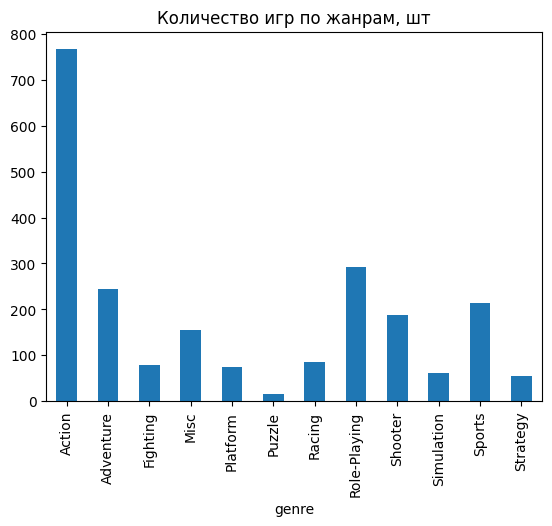


Среднее количество продаж игр по жанру, млн копий
genre
Shooter         1.245882
Sports          0.703972
Platform        0.576081
Role-Playing    0.499623
Racing          0.469294
Fighting        0.441375
Action          0.420196
Misc            0.405290
Simulation      0.350968
Puzzle          0.186471
Strategy        0.180000
Adventure       0.096490
Name: total_sales, dtype: float64



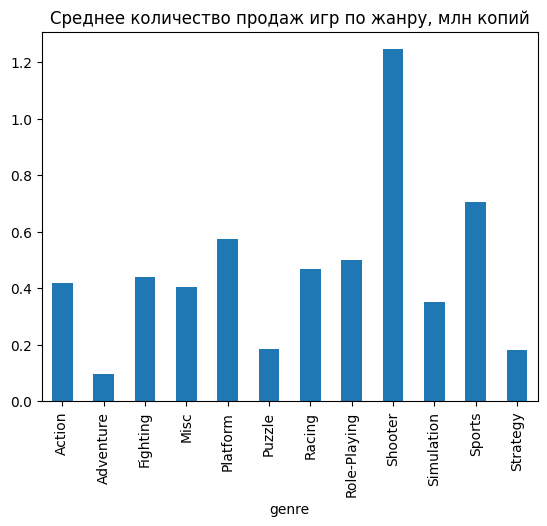


Медианное количество продаж игр по жанру, млн копий
genre
Shooter         0.450
Sports          0.240
Platform        0.225
Fighting        0.125
Role-Playing    0.125
Racing          0.120
Action          0.110
Simulation      0.100
Misc            0.100
Strategy        0.080
Puzzle          0.060
Adventure       0.030
Name: total_sales, dtype: float64

Самые продаваемые жанры
genre
Action          321.87
Shooter         232.98
Sports          150.65
Role-Playing    145.89
Misc             62.82
Name: total_sales, dtype: float64

Самые непродаваемые жанры
genre
Puzzle         3.17
Strategy      10.08
Simulation    21.76
Adventure     23.64
Fighting      35.31
Name: total_sales, dtype: float64



In [27]:
#print(games.head(1))
print()
print('Количество игр по жанрам, шт')
print(data.groupby('genre')['name'].count().sort_values(ascending = False))
print()
data.groupby('genre')['name'].count().plot(kind = 'bar', title = 'Количество игр по жанрам, шт')
plt.show()
print()

print('Среднее количество продаж игр по жанру, млн копий')
print(data.groupby('genre')['total_sales'].mean().sort_values(ascending = False))
print()
data.groupby('genre')['total_sales'].mean().plot(kind = 'bar', title = 'Среднее количество продаж игр по жанру, млн копий')
plt.show()
print()

print('Медианное количество продаж игр по жанру, млн копий')
print(data.groupby('genre')['total_sales'].median().sort_values(ascending = False))
print()

print('Самые продаваемые жанры')
print(data.groupby('genre')['total_sales'].sum().sort_values(ascending = False).head())
print()

print('Самые непродаваемые жанры')
print(data.groupby('genre')['total_sales'].sum().sort_values().head())
print()

Наблюдаем важные изменения в лидерах. Самый массовый жанр остался тем же - Action, максимальные совокупные продажи в первую очередь из-за количества выпускаемых игр. Самые продаваемые (на 1 игру) жанры поменялись, на первом месте с большим отрывом жанр shooter, далее - sports. Из-за сравнительно небольшого количества выпускаемых игр (в 3-4 раза меньше чем в жанре action), занимают 2 и 3 место соответственно по совокупным объемам продаж. Самые непродаваемые остались теми же - strategy, adventure и puzzle, причем как по количеству продаж на одну игру, так и совокупно. А в жанре adventure все также выходит много игр (3 место).

<a id="4"></a>
## Составление портрета пользователей по регионам

In [28]:
#подготовка данных
print(data.head(1))
#регион NA
top_platforms = data.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum')
print()

sales_na_total = data['na_sales'].sum()
top_platforms['na_market_share'] = top_platforms['na_sales'] / sales_na_total
#print(top_platforms.sort_values('na_sales', ascending = False))
print() 

top_genres = data.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum')
#print(top_genres.sort_values('na_sales', ascending = False))

#регион EU
top_platforms_eu = data.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum')
sales_eu_total = data['eu_sales'].sum()
top_platforms_eu['eu_market_share'] = top_platforms_eu['eu_sales'] / sales_eu_total
top_platforms['eu_sales'] = top_platforms_eu['eu_sales']
top_platforms['eu_market_share'] = top_platforms_eu['eu_market_share']
#print(top_platforms.sort_values('na_sales', ascending = False))

top_genres_eu = data.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum')
top_genres['eu_sales'] = top_genres_eu['eu_sales']

#print(top_genres.sort_values('na_sales', ascending = False))

#регион JP
top_platforms_jp = data.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum')
sales_jp_total = data['jp_sales'].sum()
top_platforms_jp['jp_market_share'] = top_platforms_jp['jp_sales'] / sales_jp_total
top_platforms['jp_sales'] = top_platforms_jp['jp_sales']
top_platforms['jp_market_share'] = top_platforms_jp['jp_market_share']
print(top_platforms.sort_values('na_sales', ascending = False))

top_genres_jp = data.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum')
top_genres['jp_sales'] = top_genres_jp['jp_sales']

print(top_genres.sort_values('na_sales', ascending = False))
print()

                  name platform  year_of_release   genre  na_sales  eu_sales  \
16  Grand Theft Auto V      PS3             2013  Action      7.02      9.09   

    jp_sales  other_sales  critic_score  user_score rating  total_sales  \
16      0.98         3.96          97.0         8.2      M        21.05   

    rating_age  
16        17.0  


          na_sales  na_market_share  eu_sales  eu_market_share  jp_sales  \
platform                                                                   
PS4         108.74         0.248429    141.09         0.359712     15.96   
XOne         93.12         0.212744     51.59         0.131530      0.34   
X360         81.66         0.186562     42.52         0.108406      0.51   
PS3          63.50         0.145073     67.81         0.172883     23.35   
3DS          38.20         0.087272     30.96         0.078933     67.81   
WiiU         29.21         0.066734     19.85         0.050608     10.88   
PC           11.11         0.025382     25.3

<a id="41"></a>
### Топ-5 популярных платформ


In [29]:
#Создание таблицы с топ5 платформ по регионам
top_platforms = top_platforms.reset_index()
#print(top_platforms)

top10_platforms_na = top_platforms.sort_values('na_market_share', ascending = False)['platform'].reset_index()
top10_platforms_eu = top_platforms.sort_values('eu_market_share', ascending = False)['platform'].reset_index()
top10_platforms_jp = top_platforms.sort_values('jp_market_share', ascending = False)['platform'].reset_index()

top10_platforms_na['platform_eu'] = top10_platforms_eu['platform']
top10_platforms_na['platform_jp'] = top10_platforms_jp['platform']


del top10_platforms_na['index']
top10_platforms_na.columns = ['top5_na', 'top5_eu', 'top5_jp']
print(top10_platforms_na.head())


  top5_na top5_eu top5_jp
0     PS4     PS4     3DS
1    XOne     PS3     PS3
2    X360    XOne     PSV
3     PS3    X360     PS4
4     3DS     3DS    WiiU


Регионы Северная Америка и Европа практически ни чем не отличаются по предпочтениям платформ, за исключением того, что PS3 не так быстро устаревает в Европе. Стоит заметить, что PlayStation и Xbox занимают прочные лидирующие позиции в рейтингах платформ по продажам игр, на них суммарно приходится 75-80% продаваемых игр. Итого - игроманы предпочитают проводить время за любимым делом дома, предпочитая примерно в равной степени одну из двух основных платформ.

Предпочтения в Японии радикально отличаются от двух других регионов: почти половина игр продается на платформе 3DS, что совокупно с 13% доли приставки PSV говорит о том, что доля проадваемых игр для портативных платформ превышает 60% (в двух других регионах порядка 8%)! Важно отметить и то, что Xbox практически отсутствует в регионе. Интерес игроков к приставе WiiU сравним с другими регионами.

<a id="42"></a>
### Топ-5 популярных жанров


In [30]:
#Создание таблицы с топ5 жанров по регионам
top_genres = top_genres.reset_index()
top10_genres_na = top_genres.sort_values('na_sales', ascending = False)['genre'].reset_index()
top10_genres_eu = top_genres.sort_values('eu_sales', ascending = False)['genre'].reset_index()
top10_genres_jp = top_genres.sort_values('jp_sales', ascending = False)['genre'].reset_index()

top10_genres_na['genre_eu'] = top10_genres_eu['genre']
top10_genres_na['genre_jp'] = top10_genres_jp['genre']


del top10_genres_na['index']
top10_genres_na.columns = ['top5_na', 'top5_eu', 'top5_jp']

print(top10_genres_na.head())

        top5_na       top5_eu       top5_jp
0        Action        Action  Role-Playing
1       Shooter       Shooter        Action
2        Sports        Sports          Misc
3  Role-Playing  Role-Playing      Fighting
4          Misc        Racing       Shooter


Регионы Северная Америка и Европа практически идентичны по предпочтениям к жанрам игр, единственное различие в топ-5 в последней строке. Япония и по предпочтениям в жанрах существенно отличается от двух других регионов, на первом месте ролевые игры, которые подвинули в рейтинге даже жанр Action. "Драки" в Японии предпочитают больше, чем "стрелялки".


<a id="43"></a>
### Влияние рейтинга ESRB на продажи


In [31]:
#print(data.head())
print()
def sales_by_rating(region):
    print('Регион - ', region)
    sales_by_rating = data.pivot_table(index = 'rating', values = region, aggfunc = 'sum')
    sales_by_rating['market_share'] = sales_by_rating[region]/data[data.isna()['rating'] == False][region].sum()
    print(sales_by_rating)
    print()
    
sales_by_rating('na_sales')
sales_by_rating('eu_sales')
sales_by_rating('jp_sales')


Регион -  na_sales
        na_sales  market_share
rating                        
E          79.05      0.226966
E10+       54.24      0.155732
M         165.21      0.474346
T          49.79      0.142956

Регион -  eu_sales
        eu_sales  market_share
rating                        
E          83.36      0.266054
E10+       42.69      0.136250
M         145.32      0.463807
T          41.95      0.133889

Регион -  jp_sales
        jp_sales  market_share
rating                        
E          15.14      0.271667
E10+        5.89      0.105688
M          14.11      0.253185
T          20.59      0.369460



Напомним, что рейтинги означают следующие возрастные ограничения:
 - «E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет и старше
 - «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
 - «M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет.
 - «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет и старше

Существенных отличий между Европейским и Американским регионом не замечено, почти половина продаж приходится на возрастную группу от 17 лет (рейтинг "М"), и по 13-15% на рейтинги "E10+" и "Т". А вот Япония выделяется существенно по долям продаж, доля рейтинга "Е" аналогична двум прочим регионам, по "Е10+" чуть меньше, но также сходство есть. Самым существенным сегментом являются игры с рейтингом "Т", его доля продаж втрое больше чем в двух других регионах. Напрашивается вывод, что либо средний возраст игроков в Японии ниже, либо дело в предпочтениях по играм..

Посмотрим теперь на игры без рейтинга:

2233



platform
3DS     199
DS        2
PC       49
PS3     145
PS4     137
PSP      64
PSV     251
Wii       4
WiiU     30
X360     35
XOne     61
Name: name, dtype: int64


/Users/nikvasily/opt/anaconda3/envs/ds_da_practicum_env-October2022/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1583: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


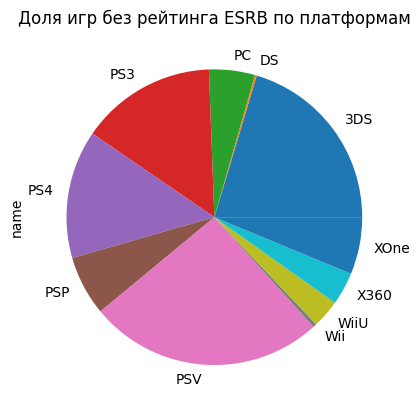

Продажи в Северной Америке
count    977.000000
mean       0.091525
std        0.449718
min        0.000000
25%        0.000000
50%        0.000000
75%        0.020000
max        6.030000
Name: na_sales, dtype: float64

Продажи в Европе
count    977.000000
mean       0.080768
std        0.357619
min        0.000000
25%        0.000000
50%        0.000000
75%        0.020000
max        5.860000
Name: eu_sales, dtype: float64

Продажи в Японии
count    977.000000
mean       0.087052
std        0.314510
min        0.000000
25%        0.000000
50%        0.020000
75%        0.060000
max        4.350000
Name: jp_sales, dtype: float64



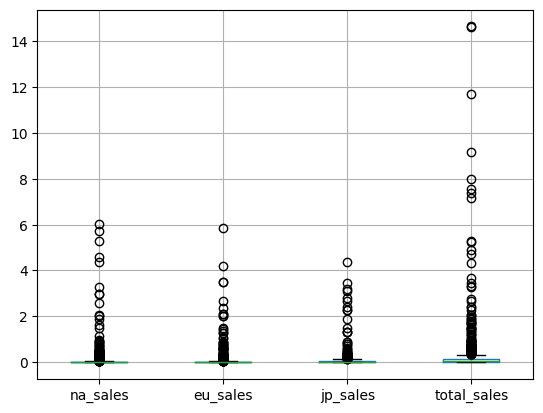

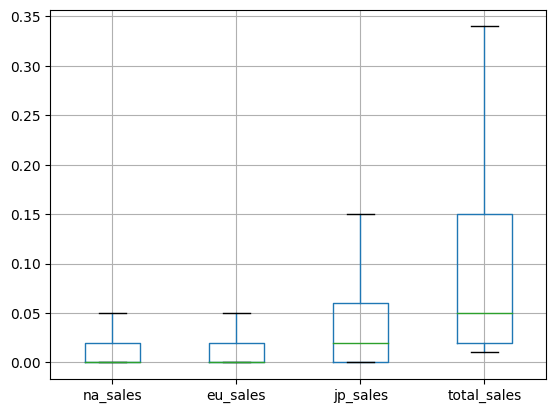

Средние продажи игр без рейтинга по миру, млн копий 0.2833572159672467
Средние продажи игр c рейтингом ESRB по миру, млн копий 0.6097477133380239

Продажи игр без рейтинга в Северной Америке, млн копий: 89.42
Продажи игр без рейтинга в Европе, млн копий: 78.91
Продажи игр без рейтинга в Японии, млн копий: 85.05

Продажи всех игр в Северной Америке, млн копий: 437.71
Продажи всех игр в Европе, млн копий: 392.23
Продажи всех игр в Японии, млн копий: 140.78000000000003


In [32]:
#print(data.head(1))
print(len(data))
print()
data_without_rating = data[data.isna()['rating'] == True]
#data_without_rating.info()
print()
#print(data_without_rating.head())
print()

# Разбивка по платформам
print(data_without_rating.groupby('platform')['name'].count())
(data_without_rating.groupby('platform')['name'].count()/len(data_without_rating)).plot(kind='pie', title = 'Доля игр без рейтинга ESRB по платформам')
plt.show()

#продажи по регионам
print('Продажи в Северной Америке')
print(data_without_rating['na_sales'].describe())
print()
print('Продажи в Европе')
print(data_without_rating['eu_sales'].describe())
print()
print('Продажи в Японии')
print(data_without_rating['jp_sales'].describe())
print()
sales_analytics = data_without_rating[['na_sales', 'eu_sales', 'jp_sales', 'total_sales']].copy()
sales_analytics.boxplot()
plt.show()

sales_analytics.boxplot(showfliers=False)
plt.show()
print('Средние продажи игр без рейтинга по миру, млн копий', sales_analytics['total_sales'].mean())
print('Средние продажи игр c рейтингом ESRB по миру, млн копий', games[games.isna()['rating'] == False]['total_sales'].mean())
print()


print('Продажи игр без рейтинга в Северной Америке, млн копий:', sales_analytics['na_sales'].sum())
print('Продажи игр без рейтинга в Европе, млн копий:', sales_analytics['eu_sales'].sum())
print('Продажи игр без рейтинга в Японии, млн копий:', sales_analytics['jp_sales'].sum())
print()
print('Продажи всех игр в Северной Америке, млн копий:', data['na_sales'].sum())
print('Продажи всех игр в Европе, млн копий:', data['eu_sales'].sum())
print('Продажи всех игр в Японии, млн копий:', data['jp_sales'].sum())


Всего без рейтинга за последние 4 года остались менее 1000 игр, что составляет порядка 45% от игр вышедших за 4 последних года. На все актуальные платформы выпускались игры без рейтинга.
Среднее количество проданных копий по всему миру для игры с рейтингом почти двое превышает игры без рейтинга. Игры без рейтинга продаются примерно одним тиражом по 3 основным регионам, что не типично для игр с рейтингом, где продажи в NA и EU превышали продажи в Японии в 2,5-3 раза. Если доля проданных копий игр без рейтинга в Северной Америке и Европе составляла чуть менее 20%, то для Японии она свыше 60%. Так мы приходим к выводу, что наличие рейтинга у игры имеет влияние на ее продажи, в Северной Америке и Европе такие игры продаются вдвое хуже, а в Японии наоборот, в 1,5 раза лучше. Похоже, дело в том, что игры, выпускаемые под Японский рынок, чаще игнорируются рейтинговыми агенствами. К сожалению, данные выводы носят предварительный характер из-за того, что реальных причин пропуска данных в рейтинге мы не знаем, их могли просто забыть перенести..

<a id="5"></a>
## Проверка гипотез

<a id="51"></a>
### Сопоставление пользовательских рейтингов платформ Xbox One и PC


In [33]:
user_rating_xbox_one = games[(games['platform'] == 'XOne')&(games.isna()['user_score'] == False)]['user_score']
user_rating_pc =  games[(games['platform'] == 'PC')&(games.isna()['user_score'] == False)]['user_score']
print(user_rating_xbox_one.head())
print()
print(user_rating_pc.head())
print()
print('Средний рейтинг игр XOne')
print(user_rating_xbox_one.mean())
print()
print('Средний рейтинг игр PC')
print(user_rating_pc.mean())
print()

alpha = 0.05  # критический уровень статистической значимости

results = st.ttest_ind(user_rating_xbox_one, user_rating_pc, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

165    7.9
179    5.4
242    6.4
270    6.2
373    4.1
Name: user_score, dtype: float64

85     7.6
138    7.3
192    4.0
218    8.2
284    9.1
Name: user_score, dtype: float64

Средний рейтинг игр XOne
6.521428571428572

Средний рейтинг игр PC
7.062467532467533

p-значение: 4.935072360183565e-06
Отвергаем нулевую гипотезу


Сформируем нулевую гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Альтернативной гипотезой в таком случае будет следующая: "Средние пользовательские рейтинги платформ Xbox One и PC отличаются". Уровень значимости примем за 5%. Дисперсии двух выборок считаем не равной друг другу. Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применим метод scipy.stats.ttest_ind (array1, array2, equal_var). 

Полученное p-value существенно ниже порогового значения, поэтому нулевую гипотезу мы отвергаем. Считаем, что средние пользовательские рейтинги платформ Xbox One и PC отличаются.

<a id="52"></a>
### Сопоставление пользовательских рейтингов жанров Action и Sports


In [34]:
user_rating_action = games[(games['genre'] == 'Action')&(games.isna()['user_score'] == False)]['user_score']
user_rating_sports =  games[(games['genre'] == 'Sports')&(games.isna()['user_score'] == False)]['user_score']
print(user_rating_action.head())
print()
print(user_rating_sports.head())
print()
print('Средний рейтинг жанра Action')
print(user_rating_action.mean())
print()
print('Средний рейтинг жанра Sports')
print(user_rating_sports.mean())
print()

alpha = 0.05  # критический уровень статистической значимости

results = st.ttest_ind(user_rating_action, user_rating_sports, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

16    8.2
17    9.0
23    8.1
24    8.7
38    8.5
Name: user_score, dtype: float64

0     8.0
3     8.0
13    7.7
15    7.4
77    4.3
Name: user_score, dtype: float64

Средний рейтинг жанра Action
7.054043715846995

Средний рейтинг жанра Sports
6.961196736174069

p-значение: 0.11483818791498286
Не получилось отвергнуть нулевую гипотезу


Сформируем нулевую гипотезу: Средние пользовательские рейтинги жанров Action и Sports одинаковые. Альтернативной гипотезой в таком случае будет следующая: "Средние пользовательские рейтинги жанров Action и Sports отличаются". Уровень значимости примем за 5%. Дисперсии двух выборок считаем не равной друг другу. Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применим метод scipy.stats.ttest_ind (array1, array2, equal_var). 

Полученное p-value выше порогового значения, поэтому нулевую гипотезу мы отвергнуть не можем. Считаем, что средние пользовательские рейтинги жанров Action и Sports равны.

<a id="6"></a>
## Выводы

Подведем итоги исследования. Выявлено:
 - Рынок компьютерных игр находится на плато после спада в 2010-2012 годах. Продажи по наиболее популярным платформам падают последние годы
 - Средний "срок жизни" платформы составляет около 10 лет, на пик по продажам игр обычно выходит на 4-5 год после появления
 - Для детального исследования факторов успешности игры был определен период в 4 последних года (2013-2016)
 - Выбраны 3 наиболее перспективные платформы: PS4, 3DS, XOne. Суммарный объем продаваемых игр в 2016 году по ним превышал 110 млн копий, фаворит среди них - PlayStation 4 с более чем 65 млн проданных игр. Частично это может объяснить популрность платформы во всем мире.
 - Оценка критиков существенно влияет на продажи игры в отличие от оценки пользователей. При оценке критиков для игры, превышающей 70 баллов, есть существенная взаимосвязь с объемом ее продаж.
 - Самый массовый жанр игр - Action, больше всего выпущенных игр и совокупных продаж. Самым продаваемыми (на одну игру) жанрами в последние годы является shooter и sports, занимающие 2 и 3 места по совокупному объему продаж игр. Жанры strategy, adventure и puzzle не стоит рассматривать в рекламных целях за редким исключением, они не относятся к широко продаваемым.
 - Наиболее распространенные платформы и жанры игр весьма схожи в регионах Северной Америки и Европы, и координально отличаются в Японии.


Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Ниже приведем основные определяющие успех игры факторы:
 - платформа
 - жанр игры
 - оценка критиков
 - рейтинг

Для выбора конкретных игр в целях продвижения (рекламы) мы предлагаем следующую цепочку:
 - 1. Выбор региона
 - 2. Выбор приоритетных платформ
 - 3. Выбор наиболее продаваемых жанров
 - 4. Анализ оценок критиков
 - 5. Учет рейтинга.
 
Именно в такой последовательности наиболее эффективно сузить список кандидатов для рекламных кампаний. Для примера, разберем выбор приоритетных игр в Японии:
- Для начала, установим для конкретного региона долю от всех затрат на рекламные кампании в соответствии с долей данного региона по продажам.
- Как мы установили, для Японии характерна распространенность портативных платформ, и на этом рынке главный игрок - Nintendo 3DS, занимающий практически половину всего рынка. В качестве стационарных (домашних) платформ, выберем PlayStation 4 как наиболее актуальную версию PlayStation.
- Поиск игр сузим с учетом наиболее популярных в Японии жанров, Role-playing, Action, Misc, Fighting, Shooter.
- Отфильтровав игры по платформам и жанрам, обратимся к оценкам критиков и выберем те игры, у которых эта оценка максимальна. В зависимости от ресурсов для проведения рекламных кампаний, установим нижнюю планку на уровне 75-90 баллов.
- Из отобранных с учетом предыдущих фильтров игр проверим рейтинг, наиболее подходящие для Японии - "Т", "Е", "М" в порядке убывания. Данный фактор не является определяющим, но иногда сможет подсказать какую из двух игр вырать в целях рекламы ("при прочих равных").
Таким образом, варьируя количество платформ, жанров и минимальную оценку критиков, мы сможем сужать/расширять выборку игр для достижения требуемого/необходимого количества, соответствующего нашим ресурсам на рекламные кампании в данном регионе.

